In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

## 2. Load the data

In [2]:
df = pd.read_csv('fifa21_male2.csv')
df.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


## 3. Explore the data (cleaning)



#### - Change headers names.
#### - Deal with NaN values.
#### - Categorical Features.
#### - Numerical Features.
#### - Exploration.

Columns:Lower case and replace space to '_'

In [3]:

df.columns = [columns.lower().replace(' ', '_') for columns in df.columns]

In [4]:
list(df.columns)

['id',
 'name',
 'age',
 'ova',
 'nationality',
 'club',
 'bov',
 'bp',
 'position',
 'player_photo',
 'club_logo',
 'flag_photo',
 'pot',
 'team_&_contract',
 'height',
 'weight',
 'foot',
 'growth',
 'joined',
 'loan_date_end',
 'value',
 'wage',
 'release_clause',
 'contract',
 'attacking',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'movement',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'power',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'goalkeeping',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'total_stats',
 'base_stats',
 'w/f',
 'sm',
 'a/w',
 'd/w',
 'ir',
 'pac',
 'sho',
 'pas',
 'dri',
 'def',
 'phy',
 

In [5]:
df.shape

(17125, 107)

Rename the columns to make it readable

In [6]:

df = df.rename(columns = {'ova':'overall_rating',
                         'bov' : 'best_overall',
                         'bp' : 'best_position',
                         'team_&_contract' : 'team_contract',
                         'pot' : 'potential',
                         'w/f' : 'week_foot_rate',
                         'a/w' : 'attacking_work_rate',
                         'd/w' : 'defense_work_rate',
                         'ir' : 'international_reputation',
                         'pac' : 'pace',
                         'sho' : 'shooting',
                         'pas' : 'passing',
                         'dri' : 'dribbling',
                         #'def' : 'defending_2', -- This was duplicated with column name 'defending'
                         'phy' : 'physical',
                         'ls' : 'left_strike',
                         'st' : 'striker',
                         'rs' : 'right_striker',
                         'lw' : 'left_winger',
                         'lf' : 'left_forward',
                         'cf' : 'center_forward',
                         'rf' : 'right_forward',
                         'rw' : 'right_winger',
                         'lam' : 'left_attacking_mf',
                         'cam' : 'center_attacking_mf',
                         'ram' : 'right_attacking_mf',
                         'lm' : 'left_mf',
                         'lcm' : 'left_center_mf',
                          'cm' : 'center_mf',
                         'rcm' : 'right_center_mf',
                         'rm' : 'right_mf',
                         'lwb' : 'left_wing_back',
                         'ldm' : 'left_defence_mf',
                         'cdm' : 'central_defence_mf',
                         'rdm' : 'right_defence_mf',
                         'lb' : 'left_back',
                         'lcb' : 'left_center_back',
                         'cb' : 'center_back',
                         'rcb' : 'right_center_back',
                         'rb' : 'right_back',
                         'gk' : 'goal_keeper',
                         'sm' : 'skill_move'})

In [7]:
df.head()

,id,name,age,overall_rating,nationality,club,best_overall,best_position,position,player_photo,club_logo,flag_photo,potential,team_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,week_foot_rate,skill_move,attacking_work_rate,defense_work_rate,international_reputation,pace,shooting,passing,dribbling,def,physical,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,2

#### Removing duplicates

In [8]:

df = df.drop_duplicates() 
df.shape

(17125, 107)

### Dealing with Null values


In [9]:
#counting the total null values in df
df.isna().sum().sum()

17753

In [10]:
#check null values in each column
obj = df.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)
    

id , 0
name , 0
age , 0
overall_rating , 0
nationality , 0
club , 23
best_overall , 0
best_position , 0
position , 413
player_photo , 0
club_logo , 23
flag_photo , 0
potential , 0
team_contract , 0
height , 0
weight , 0
foot , 0
growth , 0
joined , 58
loan_date_end , 16215
value , 0
wage , 0
release_clause , 0
contract , 0
attacking , 0
crossing , 0
finishing , 0
heading_accuracy , 0
short_passing , 0
volleys , 58
skill , 0
dribbling , 0
curve , 58
fk_accuracy , 0
long_passing , 0
ball_control , 0
movement , 0
acceleration , 0
sprint_speed , 0
agility , 58
reactions , 0
balance , 58
power , 0
shot_power , 0
jumping , 58
stamina , 0
strength , 0
long_shots , 0
mentality , 0
aggression , 0
interceptions , 7
positioning , 7
vision , 58
penalties , 0
composure , 423
defending , 0
marking , 0
standing_tackle , 0
sliding_tackle , 58
goalkeeping , 0
gk_diving , 0
gk_handling , 0
gk_kicking , 0
gk_positioning , 0
gk_reflexes , 0
total_stats , 0
base_stats , 0
week_foot_rate , 0
skill_move , 0


In [11]:
# 1. Check'loan_date_end'
df['loan_date_end'].value_counts()

Jun 30, 2021    556
Jun 30, 2020    112
Dec 31, 2020     77
Jun 30, 2019     24
Jun 30, 2018     19
May 31, 2021     17
Dec 31, 2021     15
Jan 31, 2021     14
Jun 30, 2022     11
Jan 1, 2021       9
Jun 30, 2017      6
Nov 30, 2020      6
Nov 27, 2021      5
May 31, 2019      5
Jun 23, 2021      4
May 31, 2020      3
Dec 31, 2019      2
Jan 3, 2021       2
Jun 1, 2021       2
Jun 30, 2014      2
May 31, 2018      2
Aug 31, 2021      1
Dec 30, 2020      1
Jul 1, 2021       1
May 31, 2022      1
Aug 31, 2020      1
Jun 30, 2023      1
Jul 5, 2021       1
Jan 30, 2021      1
May 25, 2016      1
Apr 30, 2015      1
Dec 30, 2021      1
Jan 17, 2021      1
Jan 2, 2016       1
Jan 4, 2021       1
Jun 30, 2015      1
Jun 30, 2016      1
Jul 31, 2021      1
Name: loan_date_end, dtype: int64

In [12]:
# Drop the column loan_date_end as it is so little filled. 
df = df.drop(['loan_date_end'], axis=1)
df

,id,name,age,overall_rating,nationality,club,best_overall,best_position,position,player_photo,club_logo,flag_photo,potential,team_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,week_foot_rate,skill_move,attacking_work_rate,defense_work_rate,international_reputation,pace,shooting,passing,dribbling,def,physical,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78

In [13]:
# Check composure
df['composure'].value_counts()

65.0    667
58.0    632
60.0    625
62.0    624
64.0    608
       ... 
93.0      2
96.0      1
16.0      1
17.0      1
95.0      1
Name: composure, Length: 84, dtype: int64

In [14]:
# Fill in the mean
composure_mean = round(df['composure'].mean())
composure_mean

60

In [15]:
df['composure'] = df['composure'] .fillna(composure_mean)

In [16]:
# Check position and fill in with the maximum value
df['position'].value_counts()

CB            2047
ST            1818
GK            1517
CDM CM         748
LB             654
              ... 
ST LM RB         1
LM CAM CDM       1
RW LM ST         1
LM LWB ST        1
CAM RW LM        1
Name: position, Length: 622, dtype: int64

In [17]:
df['position'] = df['position'] .fillna('CB')
df['position'].value_counts()
df.isna().sum().sum()

702

In [18]:
# Fill in the mean of below columns
#volleys , 58
#curve , 58
#agility , 58
#balance , 58
#jumping , 58
#vision , 58
#sliding_tackle , 58
#attacking_work_rate , 89
#defense_work_rate , 89
df['volleys'] = df['volleys'] .fillna(composure_mean)
df['curve'] = df['curve'] .fillna(composure_mean)
df['agility'] = df['agility'] .fillna(composure_mean)
df['balance'] = df['balance'] .fillna(composure_mean)
df['jumping'] = df['jumping'] .fillna(composure_mean)
df['vision'] = df['vision'] .fillna(composure_mean)
df['sliding_tackle'] = df['sliding_tackle'] .fillna(composure_mean)
df['attacking_work_rate'] = df['attacking_work_rate'] .fillna(composure_mean)
df['defense_work_rate'] = df['defense_work_rate'] .fillna(composure_mean)
df.isna().sum().sum()

118

In [19]:
#club , 23

df['club'].value_counts()

Manchester United      45
Chelsea                45
Bolton Wanderers       45
Sunderland             43
AS Monaco              43
                       ..
Scotland                1
Padova                  1
Vicenza                 1
Denmark                 1
CF Rayo Majadahonda     1
Name: club, Length: 917, dtype: int64

In [20]:
# Fill in with the max number of values
df['club'] = df['club'].fillna('Bolton Wanderers')

In [21]:
# Fill in Joined with the highest joined date

df['joined'].value_counts()

Jul 1, 2019     1176
Jul 1, 2018      889
Jul 1, 2017      569
Jan 1, 2019      391
Jul 1, 2020      329
                ... 
Dec 2, 2015        1
Jun 28, 2016       1
Nov 17, 2015       1
Jan 6, 2011        1
Oct 1, 2003        1
Name: joined, Length: 1953, dtype: int64

In [22]:
df['joined'] = df['joined'].fillna('Jul 1, 2019')
df['joined'].value_counts()

Jul 1, 2019     1234
Jul 1, 2018      889
Jul 1, 2017      569
Jan 1, 2019      391
Jul 1, 2020      329
                ... 
Dec 2, 2015        1
Jun 28, 2016       1
Nov 17, 2015       1
Jan 6, 2011        1
Oct 1, 2003        1
Name: joined, Length: 1953, dtype: int64

In [23]:
# Check the total null values
df.isna().sum().sum()

37

In [24]:
# drop the rests because the numbers are very little
df = df.dropna()
df.shape

(17095, 106)

### Clean up the data types: Check the numerical and categorical data and correct


In [25]:
# Assign numerical data into num
num = df.select_dtypes('int64', 'float')
num

,id,age,overall_rating,best_overall,potential,growth,attacking,crossing,finishing,heading_accuracy,short_passing,skill,dribbling,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,reactions,power,shot_power,stamina,strength,long_shots,mentality,aggression,penalties,defending,marking,standing_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pace,shooting,passing,dribbling,def,physical
0,2,33,69,71,69,0,313,75,50,59,71,338,73,60,69,71,347,68,74,69,347,74,69,68,68,320,72,50,208,70,69,56,14,5,15,10,12,1929,408,71,59,70,71,68,69
1,16,37,71,70,71,0,337,68,64,61,76,369,69,79,71,71,305,56,50,65,324,75,64,60,71,362,71,75,153,70,43,56,9,12,13,11,11,1906,385,53,69,73,69,58,63
2,27,33,71,71,71,0,337,80,64,41,77,387,79,77,69,78,295,48,42,59,284,72,29,56,69,317,69,66,99,35,34,51,9,6,13,16,7,1770,354,45,68,76,77,36,52
3,36,36,68,70,82,14,264,54,70,60,80,255,68,46,64,77,176,59,62,55,239,63,51,66,59,271,59,70,75,34,41,68,5,21,64,21,21,1348,369,61,66,66,69,47,60
4,41,36,81,82,81,0,367,75,69,54,90,408,85,70,83,90,346,61,56,75,297,67,58,62,70,370,58,71,181,68,57,45,6,13,6,13,7,2014,420,58,70,85,85,63,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,22,64,66,69,5,197,35,23,66,47,193,44,33,34,56,243,52,55,48,279,48,59,74,28,218,69,39,198,61,71,39,11,8,8,5,7,1367,302,54,30,37,48,64,69
17121,259090,18,56,58,66,10,248,50,43,50,64,264,57,50,61,54,298,61,63,54,271,51,53,57,48,259,51,50,132,34,42,57,12,15,7,12,11,1529,319,62,46,57,56,43,55
17122,259091,18,56,56,67,11,218,55,34,53,42,212,52,34,36,47,308,66,61,59,233,28,53,54,37,256,58,49,163,55,54,40,8,7,5,12,8,1430,303,63,35,44,52,54,55
17123,259101,20,62,62,73,11,223,62,26,52,60,258,55,46,57,57,349,72,70,56,261,51,57,48,33,257,61,36,180,57,62,51,15,13,8,6,9,1579,335,71,34,58,59,59,54


In [26]:
# Assign the categorical data types to cat
cat = df.select_dtypes('object')
cat

,name,nationality,club,best_position,position,player_photo,club_logo,flag_photo,team_contract,height,weight,foot,joined,value,wage,release_clause,contract,week_foot_rate,skill_move,attacking_work_rate,defense_work_rate,international_reputation,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,gender
0,G. Pasquale,Italy,Udinese,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,"Jul 1, 2008",€625K,€7K,€0,2008 ~ 2016,3 ★,2★,Medium,High,2 ★,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,"Jul 19, 2014",€600K,€7K,€1.1M,2014 ~ 2019,4 ★,3★,Medium,Medium,1 ★,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,J. Cole,England,Coventry City,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,"Jan 7, 2016",€1.1M,€15K,€0,2016 ~ 2020,4 ★,4★,Medium,Low,2 ★,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,CB,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,Sunderland 2009,"5'11""",165lbs,Right,"Jul 1, 2019",€0,€0,€0,2009,3 ★,1★,60,60,1 ★,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,"Jul 16, 2018",€5.5M,€12K,€7.2M,2018 ~ 2021,4 ★,4★,High,Medium,4 ★,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,https://cdn.sofifa.com/teams/112516/light_60.png,https://cdn.sofifa.com/flags/fr.png,"CD Tondela Jun 30, 2021 On Loan","6'6""",165lbs,Right,"Sep 29, 2020",€550K,€2K,€0,"Jun 30, 2021 On Loan",2 ★,2★,Medium,Medium,1 ★,5,43+2,43+2,43+2,41+0,41+0,41+0,41+0,41+0,41+2,41+2,41+2,43+2,44+2,44+2,44+2,43+2,54+2,55+2,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,W. Rickard,Wales,Burnley,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-wls.png,Burnley 2020 ~ 2021,"5'10""",170lbs,Right,"Aug 20, 2020",€130K,€3K,€273K,2020 ~ 2021,3 ★,2★,Medium,Medium,1 ★,5,53+2,53+2,53+2,55+0,54+0,54+0,54+0,55+0,56+2,56+2,56+2,56+2,55+2,55+2,55+2,56+2,53+2,52+2,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,C. Barrett,England,Burnley,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flag

In [27]:
# Check unique values in categorical columns and see what needs to be ammended
for column in cat.columns:
    print(column, cat[column].unique())

name ['G. Pasquale' 'Luis García' 'J. Cole' ... 'C. Barrett' 'J. Gazibegović'
 'Pablo Rodríguez']
nationality ['Italy' 'Spain' 'England' 'Trinidad &amp; Tobago' 'Germany' 'Turkey'
 'Wales' 'Republic of Ireland' 'Nigeria' 'Brazil' 'Australia' 'Hungary'
 'Argentina' 'Portugal' 'Netherlands' 'France' 'Norway' 'Bulgaria'
 'Poland' 'United States' 'Mali' 'Finland' 'Iceland' 'Czech Republic'
 'Serbia' 'Sweden' 'Georgia' 'Denmark' 'Senegal' 'Israel' 'Cameroon'
 'Greece' 'Scotland' 'Ukraine' 'China PR' 'Colombia' 'Belgium'
 'Ivory Coast' 'Switzerland' 'Canada' 'Chile' 'Peru' 'Paraguay' 'Mexico'
 'Japan' 'Ghana' 'Korea Republic' 'Belarus' 'Egypt' 'Congo' 'Uruguay'
 'South Africa' 'Northern Ireland' 'Togo' 'Jamaica' 'Austria' 'Algeria'
 'Morocco' 'Albania' 'North Macedonia' 'Slovenia' 'Madagascar' 'Croatia'
 'Kosovo' 'Estonia' 'Moldova' 'Bosnia Herzegovina' 'Russia' 'Romania'
 'Antigua &amp; Barbuda' 'Burkina Faso' 'Panama' 'Gibraltar' 'Venezuela'
 'Benin' 'Cyprus' 'Iran' 'Haiti' 'Slovakia' 'Ecu

attacking_work_rate ['Medium' 60 'High' 'Low']
defense_work_rate ['High' 'Medium' 'Low' 60]
international_reputation ['2 ★' '1 ★' '4 ★' '3 ★' '5 ★']
hits ['4' '11' '3' '149' '7' '9' '10' '5' '8' '154' '6' '18' '34' '19' '15'
 '14' '27' '21' '309' '32' '16' '151' '750' '13' '39' '83' '442' '92' '23'
 '29' '30' '20' '12' '31' '297' '36' '90' '88' '24' '171' '40' '25' '22'
 '60' '103' '38' '82' '57' '17' '26' '44' '67' '571' '61' '68' '37' '231'
 '58' '62' '28' '51' '45' '80' '162' '59' '138' '220' '93' '47' '281' '33'
 '46' '35' '830' '43' '64' '49' '48' '54' '259' '161' '74' '434' '42'
 '131' '222' '229' '125' '142' '81' '128' '78' '109' '72' '75' '111' '63'
 '123' '136' '89' '55' '663' '97' '41' '143' '73' '464' '232' '164' '212'
 '129' '79' '107' '69' '117' '71' '101' '202' '140' '110' '66' '6.3K'
 '122' '95' '189' '157' '215' '52' '248' '178' '238' '208' '214' '407'
 '1.2K' '349' '180' '224' '155' '147' '98' '99' '152' '148' '120' '167'
 '158' '70' '328' '183' '56' '141' '173' '132' 

left_wing_back ['71+-2' '62+1' '52+0' '56+0' '70+3' '50+0' '66+2' '73+0' '67+0' '72+0'
 '57+1' '63+0' '29+0' '58+0' '55+0' '51+0' '24+0' '23+0' '78+0' '74+1'
 '52+1' '61+1' '75+0' '28+3' '74+0' '76+0' '38+1' '25+0' '62+0' '52+2'
 '68+1' '70+0' '66+0' '27+2' '23+1' '75+1' '27+1' '50+2' '65+2' '54+1'
 '55+1' '63+2' '30+0' '54+0' '57+0' '72+1' '86+0' '72+-1' '47+0' '29+3'
 '67+-3' '49+0' '61+0' '71+0' '47+1' '66+1' '65+1' '42+1' '47+2' '57+3'
 '58+3' '54+2' '69+1' '65+0' '58+2' '50+1' '74+2' '24+2' '70+1' '76+1'
 '74+-2' '63+1' '71+1' '53+0' '53+1' '61+2' '56+1' '72+2' '28+1' '70+2'
 '26+3' '60+1' '49+2' '59+2' '68+3' '55+3' '60+2' '65+3' '71+2' '37+0'
 '42+2' '49+3' '47+3' '68+0' '43+1' '50+3' '51+1' '67+1' '44+0' '46+1'
 '53+3' '62+2' '72+3' '64+0' '68+2' '56+2' '60+0' '57+2' '28+2' '29+2'
 '27+3' '59+1' '64+2' '69+0' '69+2' '23+2' '55+2' '26+0' '44+1' '45+1'
 '26+2' '73+2' '58+1' '70+-1' '75+3' '79+0' '41+2' '25+2' '59+0' '20+2'
 '64+3' '21+2' '56+3' '31+0' '53+2' '76+3' '22+2' '24+1' 

In [28]:
# height: convert height into cm
df['height'] = df['height'].str.replace('"', '')
df['height'] = df['height'].apply(lambda x: int(x.split("'")[0])*30.48 + int(x.split("'")[1])*2.54)

In [29]:
# weight : convert weight into kg
df['weight'] = df['weight'].str.replace("lbs", "")
df['weight']= df['weight'].apply(lambda x: int(x)*0.45)
df['weight']

0        81.45
1        64.35
2        72.45
3        74.25
4        67.50
         ...  
17120    74.25
17121    76.50
17122    69.30
17123    66.60
17124    69.30
Name: weight, Length: 17095, dtype: float64

In [30]:
# height and weight: convert into int
df['height'] = df["height"].astype(int)
df['weight'] = df['weight'].astype(int)

In [31]:
# Value/wage/release_clause: change into full number. K == 000, M == 000000

df['value'] = df['value'].replace({'€':'', 'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype('int')
df['wage'] = df['wage'].replace({'€':'', 'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype('int')
df['release_clause'] = df['release_clause'].replace({'€':'', 'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype('int')
df['hits'] = df['hits'].replace({'€':'', 'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype('int')

#reference: https://stackoverflow.com/questions/39684548/convert-the-string-2-90k-to-2900-or-5-2m-to-5200000-in-pandas-dataframe


In [32]:
# Check if the columns is updated
df.head()

,id,name,age,overall_rating,nationality,club,best_overall,best_position,position,player_photo,club_logo,flag_photo,potential,team_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,week_foot_rate,skill_move,attacking_work_rate,defense_work_rate,international_reputation,pace,shooting,passing,dribbling,def,physical,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,182,81,Left,0,"Jul 1, 2008",625000,7000,0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,60.0,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,177,64,Right,0,"Jul 19, 2014",600000,7000,1100000,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,175,72,Right,0,"Jan 7, 2016",1100000,15000,0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,60.0,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,CB,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,180,74,Right,14,"Jul 1, 2019",0,0,0,2009,264,54,70,60,80,60.0,255,68,60.0,46,64,77,176,59,62,60.0,55,60.0,239,63,60.0,51,66,59,271,59,70.0,72.0,60.0,70,60.0,75,34,41,60.0,68,5,21,64,21,21,1348,369,3 ★,1★,60,60,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,170,67,Right,0,"Jul 16, 2018",5500000,12000,7200000,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,

In [33]:
# Covert value, wage and release_clause to 1000/K units
df['value'] = df['value']/1000
df['value'] 

0         625.0
1         600.0
2        1100.0
3           0.0
4        5500.0
          ...  
17120     550.0
17121     130.0
17122     130.0
17123     475.0
17124     325.0
Name: value, Length: 17095, dtype: float64

In [34]:
# same for the wage and release_clause and rename the columns to specify the unit (K)
df['wage'] = df['wage']/1000
df['release_clause'] = df['release_clause']/1000
df = df.rename(columns = {'value' : 'value_k',
                          'wage' : 'wage_k',
                          'release_clause' : 'release_clause_k'})

In [35]:
df.head()

,id,name,age,overall_rating,nationality,club,best_overall,best_position,position,player_photo,club_logo,flag_photo,potential,team_contract,height,weight,foot,growth,joined,value_k,wage_k,release_clause_k,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,week_foot_rate,skill_move,attacking_work_rate,defense_work_rate,international_reputation,pace,shooting,passing,dribbling,def,physical,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,182,81,Left,0,"Jul 1, 2008",625.0,7.0,0.0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,60.0,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,177,64,Right,0,"Jul 19, 2014",600.0,7.0,1100.0,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,175,72,Right,0,"Jan 7, 2016",1100.0,15.0,0.0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,60.0,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,CB,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,180,74,Right,14,"Jul 1, 2019",0.0,0.0,0.0,2009,264,54,70,60,80,60.0,255,68,60.0,46,64,77,176,59,62,60.0,55,60.0,239,63,60.0,51,66,59,271,59,70.0,72.0,60.0,70,60.0,75,34,41,60.0,68,5,21,64,21,21,1348,369,3 ★,1★,60,60,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,170,67,Right,0,"Jul 16, 2018",5500.0,12.0,7200.0,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71

In [36]:
df.dtypes['value_k']

dtype('float64')

In [37]:
# change value, wage and release_clause from float to int

df['value_k'] = df["value_k"].astype(int)
df['wage_l'] = df['wage_k'].astype(int)
df['release_clause_k'] = df['release_clause_k'].astype(int)

In [38]:
# remove the stars from week_foot_rate, sm, international_reputation and change to numerical
df['week_foot_rate'] = [column.replace("★", "") for column in df['week_foot_rate']]
df['skill_move'] = [column.replace("★", "") for column in df['skill_move']]
df['international_reputation'] = [column.replace("★", "") for column in df['international_reputation']]


In [39]:
# joined : extract the year and call the new column 'joined_year'
df['joined'] = pd.to_datetime(df['joined'])
df['joined_year'] = df['joined'].dt.strftime('%Y')

In [40]:
# drop 'joined'
df = df.drop(['joined'], axis =1)

In [41]:
# contract : split into contract_start and contract_end
df[['contract_start', 'contract_end']] = df.contract.str.split("~",expand=True)


In [42]:
df['contract_start']

0                       2008 
1                       2014 
2                       2016 
3                        2009
4                       2018 
                 ...         
17120    Jun 30, 2021 On Loan
17121                   2020 
17122                   2020 
17123                   2020 
17124                   2020 
Name: contract_start, Length: 17095, dtype: object

In [43]:
# replace some values with the correct year
df['contract_start'] = df['contract_start'].str.replace('Jun 30, 2021 On Loan', '2021')

df['contract_start'] = df['contract_start'].str.replace('Jun 30, 2020 On Loan', '2020')

df['contract_start'] = df['contract_start'].str.replace('Dec 31, 2020 On Loan', '2020')
df['contract_start'].value_counts()[:50]
#df['contract_start']


2019                    4357
2020                    3882
2018                    2788
2017                    1736
2016                    1000
2015                     612
2021                     554
2014                     409
Free                     309
2013                     269
2020                     188
2012                     179
2011                     136
2010                      89
2009                      50
2008                      42
2007                      28
Jun 30, 2019 On Loan      24
2005                      21
May 31, 2021 On Loan      17
Dec 31, 2021 On Loan      15
Jun 30, 2018 On Loan      15
Jan 31, 2021 On Loan      14
2006                      13
2007                      13
Jun 30, 2022 On Loan      11
2003                      10
Jan 1, 2021 On Loan        9
2010                       9
2008                       9
2009                       8
2004                       7
Ivory Coast Free           7
Nov 30, 2020 On Loan       6
1998          

In [44]:
#change contract_start to numeric and drop rows which cannot be converted
df['contract_start'] =  pd.to_numeric(df['contract_start'], errors='coerce')

In [45]:
df['contract_start'].value_counts()

2019.0      4357
2020.0      4070
2018.0      2788
2017.0      1736
2016.0      1000
2015.0       612
2021.0       554
2014.0       409
2013.0       270
2012.0       179
2011.0       137
2010.0        98
2009.0        58
2008.0        51
2007.0        41
2005.0        21
2006.0        13
2003.0        10
2004.0         7
2002.0         6
1998.0         6
2001.0         3
111648.0       3
1999.0         2
1993.0         2
2000.0         2
1990.0         1
1992.0         1
1991.0         1
1996.0         1
1995.0         1
Name: contract_start, dtype: int64

In [46]:
# drop the rows with 111648
df.drop(df.loc[df['contract_start']==111648].index, inplace=True)
df.shape

(17092, 109)

In [47]:
# check if the dtypes is changed to numerical
df['contract_start'].dtypes

dtype('float64')

In [48]:
# Check the values in the contract_end
df['contract_end']


0         2016
1         2019
2         2020
3         None
4         2021
         ...  
17120     None
17121     2021
17122     2022
17123     2023
17124     2024
Name: contract_end, Length: 17092, dtype: object

In [49]:
df['contract_end'].isna().sum()

1267

In [50]:
df['contract_end'].value_counts()




 2021    4847
 2022    3699
 2023    2811
 2020    1712
 2024    1580
 2025     433
 2019     257
 2018     126
 2017      93
 2016      80
 2015      60
 2014      46
 2013      29
 2012      26
 2011      20
 2026       4
 2028       1
 2027       1
Name: contract_end, dtype: int64

In [51]:
#fillin the null values with the highest year contract date but here I chose 2022 so the contract_end year can be streched
df['contract_end'] = df['contract_end'] .fillna('2022')

In [52]:
# check the null values in contract_end
df['contract_end'].isna().sum()

0

In [53]:
# change it into string and into numeric (int)
df['contract_end'] = df['contract_end'].astype(str).astype(int)

In [54]:
# check if the dtypes of contract end became numeric
df['contract_end'].dtypes

dtype('int64')

In [55]:
# Clean : attacking_work_rate , 'defence_work_rate' by replacing '60' to Medium
df[['attacking_work_rate','defense_work_rate']] = df[['attacking_work_rate','defense_work_rate']].replace([60], ['Medium'])

In [56]:
df[['attacking_work_rate','defense_work_rate']]
df['attacking_work_rate'].value_counts()

Medium    11105
High       5138
Low         849
Name: attacking_work_rate, dtype: int64

In [57]:
# From column 'left_strike' to 'goal_keeper' : remove the +'number'
columns = ['left_strike', 
'striker',
'right_striker',
'left_winger',
'left_forward',
'center_forward',
'right_forward',
'right_winger',
'left_attacking_mf',
'center_attacking_mf',
'right_attacking_mf',
'left_mf',
'left_center_mf',
'center_mf',
'right_center_mf',
'right_mf',
'left_wing_back',
'left_defence_mf',
'central_defence_mf',
'right_defence_mf',
'rwb',
'left_back',
'left_center_back',
'center_back',
'right_center_back',
'right_back',
'goal_keeper']


for col in columns:
   df[col]= df[col].str[:2]

df    

,id,name,age,overall_rating,nationality,club,best_overall,best_position,position,player_photo,club_logo,flag_photo,potential,team_contract,height,weight,foot,growth,value_k,wage_k,release_clause_k,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,week_foot_rate,skill_move,attacking_work_rate,defense_work_rate,international_reputation,pace,shooting,passing,dribbling,def,physical,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,gender,wage_l,joined_year,contract_start,contract_end
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,182,81,Left,0,625,7.0,0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,60.0,208,70,69,69.0,56,14,5,15,10,12,1929,408,3,2,Medium,High,2,71,59,70,71,68,69,4,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70,17,Male,7,2008,2008.0,2016
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,177,64,Right,0,600,7.0,1100,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4,3,Medium,Medium,1,53,69,73,69,58,63,4,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,66,66,66,62,60,60,60,60,60,17,Male,7,2014,2014.0,2019
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,175,72,Right,0,1100,15.0,0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,60.0,99,35,34,30.0,51,9,6,13,16,7,1770,354,4,4,Medium,Low,2,45,68,76,77,36,52,11,64,64,64,70,69,69,69,70,71,71,71,68,66,66,66,68,52,54,54,54,52,47,46,46,46,47,15,Male,15,2016,2016.0,2020
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,CB,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,180,74,Right,14,0,0.0,0,2009,264,54,70,60,80,60.0,255,68,60.0,46,64,77,176,59,62,60.0,55,60.0,239,63,60.0,51,66,59,271,59,70.0,72.0,60.0,70,60.0,75,34,41,60.0,68,5,21,64,21,21,1348,369,3,1,Medium,Medium,1,61,66,66,69,47,60,3,67,67,67,66,67,67,67,66,70,70,70,66,68,68,68,66,56,65,65,65,56,57,51,51,51,57,22,Male,0,2019,2009.0,2022
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,170,67,Right,0,5500,12.0,7200,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4,4,High,Medium,4,58,70,85,85,63,59,149,72,72,72,79,79,79,79,79,82,82,82,79,81,81,81,79,70,73,73,73,70,67,64,64,64,67,17,Male,12,2018,2018.0,2021
...,...,...,...,...

### Apply values to numerical
Now the data is mostly clean. Go through the columns again and check if any categorical columns are not converted to numerical.

In [58]:
# Column in goal_keeper still has '+' included
df['goal_keeper'].unique()
df['goal_keeper'] = df['goal_keeper'].str.replace('+', '')

In [59]:
# Change the columns into numeric
for col in columns:
   df[col]= df[col].apply(pd.to_numeric)

In [60]:
# final check with numerical
df.select_dtypes('int','float64')

,id,age,overall_rating,best_overall,potential,height,weight,growth,value_k,release_clause_k,attacking,crossing,finishing,heading_accuracy,short_passing,skill,dribbling,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,reactions,power,shot_power,stamina,strength,long_shots,mentality,aggression,penalties,defending,marking,standing_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pace,shooting,passing,dribbling,def,physical,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,wage_l,contract_end
0,2,33,69,71,69,182,81,0,625,0,313,75,50,59,71,338,73,60,69,71,347,68,74,69,347,74,69,68,68,320,72,50,208,70,69,56,14,5,15,10,12,1929,408,71,59,70,71,68,69,4,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70,17,7,2016
1,16,37,71,70,71,177,64,0,600,1100,337,68,64,61,76,369,69,79,71,71,305,56,50,65,324,75,64,60,71,362,71,75,153,70,43,56,9,12,13,11,11,1906,385,53,69,73,69,58,63,4,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,66,66,66,62,60,60,60,60,60,17,7,2019
2,27,33,71,71,71,175,72,0,1100,0,337,80,64,41,77,387,79,77,69,78,295,48,42,59,284,72,29,56,69,317,69,66,99,35,34,51,9,6,13,16,7,1770,354,45,68,76,77,36,52,11,64,64,64,70,69,69,69,70,71,71,71,68,66,66,66,68,52,54,54,54,52,47,46,46,46,47,15,15,2020
3,36,36,68,70,82,180,74,14,0,0,264,54,70,60,80,255,68,46,64,77,176,59,62,55,239,63,51,66,59,271,59,70,75,34,41,68,5,21,64,21,21,1348,369,61,66,66,69,47,60,3,67,67,67,66,67,67,67,66,70,70,70,66,68,68,68,66,56,65,65,65,56,57,51,51,51,57,22,0,2022
4,41,36,81,82,81,170,67,0,5500,7200,367,75,69,54,90,408,85,70,83,90,346,61,56,75,297,67,58,62,70,370,58,71,181,68,57,45,6,13,6,13,7,2014,420,58,70,85,85,63,59,149,72,72,72,79,79,79,79,79,82,82,82,79,81,81,81,79,70,73,73,73,70,67,64,64,64,67,17,12,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,22,64,66,69,198,74,5,550,0,197,35,23,66,47,193,44,33,34,56,243,52,55,48,279,48,59,74,28,218,69,39,198,61,71,39,11,8,8,5,7,1367,302,54,30,37,48,64,69,5,43,43,43,41,41,41,41,41,41,41,41,43,44,44,44,43,54,55,55,55,54,57,64,64,64,57,12,2,2022
17121,259090,18,56,58,66,177,76,10,130,273,248,50,43,50,64,264,57,50,61,54,298,61,63,54,271,51,53,57,48,259,51,50,132,34,42,57,12,15,7,12,11,1529,319,62,46,57,56,43,55,5,53,53,53,55,54,54,54,55,56,56,56,56,55,55,55,56,53,52,52,52,53,52,49,49,49,52,17,3,2021
17122,259091,18,56,56,67,175,69,11,130,273,218,55,34,53,42,212,52,34,36,47,308,66,61,59,233,28,53,54,37,256,58,49,163,55,54,40,8,7,5,12,8,1430,303,63,35,44,52,54,55,3,46,46,46,50,47,47,47,50,47,47,47,50,46,46,46,50,54,50,50,50,54,54,54,54,54,54,14,2,2022
17123,259101,20,62,62,73,175,66,11,475,784,223,62,26,52,60,258,55,46,57,57,349,72,70,56,261,51,57,48,33,257,61,36,180,57,62,51,15,13,8,6,9,1579,335,71,34,58,59,59,54,5,48,48,48,55,52,52,52,55,54,54,54,56,55,55,55,56,60,58,58,58,60,60,58,58,58,60,16,3,2023


In [61]:
# final check with categorical
df.select_dtypes('object')

,name,nationality,club,best_position,position,player_photo,club_logo,flag_photo,team_contract,foot,contract,week_foot_rate,skill_move,attacking_work_rate,defense_work_rate,international_reputation,gender,joined_year
0,G. Pasquale,Italy,Udinese,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,Udinese 2008 ~ 2016,Left,2008 ~ 2016,3,2,Medium,High,2,Male,2008
1,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,KAS Eupen 2014 ~ 2019,Right,2014 ~ 2019,4,3,Medium,Medium,1,Male,2014
2,J. Cole,England,Coventry City,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Coventry City 2016 ~ 2020,Right,2016 ~ 2020,4,4,Medium,Low,2,Male,2016
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,CB,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,Sunderland 2009,Right,2009,3,1,Medium,Medium,1,Male,2019
4,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,Vissel Kobe 2018 ~ 2021,Right,2018 ~ 2021,4,4,High,Medium,4,Male,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,https://cdn.sofifa.com/teams/112516/light_60.png,https://cdn.sofifa.com/flags/fr.png,"CD Tondela Jun 30, 2021 On Loan",Right,"Jun 30, 2021 On Loan",2,2,Medium,Medium,1,Male,2020
17121,W. Rickard,Wales,Burnley,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-wls.png,Burnley 2020 ~ 2021,Right,2020 ~ 2021,3,2,Medium,Medium,1,Male,2020
17122,C. Barrett,England,Burnley,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Burnley 2020 ~ 2022,Right,2020 ~ 2022,3,2,Medium,Medium,1,Male,2020
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,https://cdn.sofifa.com/teams/209/light_60.png,https://cdn.sofifa.com/flags/ba.png,SK Sturm Graz 2020 ~ 2023,Right,2020 ~ 2023,4,2,High,Medium,1,Male,2020


In [62]:
# Change 'week_foot_rate', 'skill_move'.... into numerical
df[["week_foot_rate", "skill_move", "international_reputation", "joined_year", "contract_end"]] = df[["week_foot_rate", "skill_move", "international_reputation", "joined_year", "contract_end"]].apply(pd.to_numeric)

In [63]:
df['goal_keeper'] = df['goal_keeper'].apply(pd.to_numeric) # change to numerical

In [64]:
df.select_dtypes('object')

,name,nationality,club,best_position,position,player_photo,club_logo,flag_photo,team_contract,foot,contract,attacking_work_rate,defense_work_rate,gender
0,G. Pasquale,Italy,Udinese,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,Udinese 2008 ~ 2016,Left,2008 ~ 2016,Medium,High,Male
1,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,KAS Eupen 2014 ~ 2019,Right,2014 ~ 2019,Medium,Medium,Male
2,J. Cole,England,Coventry City,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Coventry City 2016 ~ 2020,Right,2016 ~ 2020,Medium,Low,Male
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,CB,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,Sunderland 2009,Right,2009,Medium,Medium,Male
4,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,Vissel Kobe 2018 ~ 2021,Right,2018 ~ 2021,High,Medium,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,https://cdn.sofifa.com/teams/112516/light_60.png,https://cdn.sofifa.com/flags/fr.png,"CD Tondela Jun 30, 2021 On Loan",Right,"Jun 30, 2021 On Loan",Medium,Medium,Male
17121,W. Rickard,Wales,Burnley,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-wls.png,Burnley 2020 ~ 2021,Right,2020 ~ 2021,Medium,Medium,Male
17122,C. Barrett,England,Burnley,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Burnley 2020 ~ 2022,Right,2020 ~ 2022,Medium,Medium,Male
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,https://cdn.sofifa.com/teams/209/light_60.png,https://cdn.sofifa.com/flags/ba.png,SK Sturm Graz 2020 ~ 2023,Right,2020 ~ 2023,High,Medium,Male


In [65]:
# there were some error in contract_start. Let's check
df.select_dtypes('int', 'float')
df['contract_start']

0        2008.0
1        2014.0
2        2016.0
3        2009.0
4        2018.0
          ...  
17120    2021.0
17121    2020.0
17122    2020.0
17123    2020.0
17124    2020.0
Name: contract_start, Length: 17092, dtype: float64

In [66]:
# There were some null values
print('contract_start', df['contract_start'].unique())


contract_start [2008. 2014. 2016. 2009. 2018. 2011. 2019. 1990. 1991. 1993. 2005. 2010.
 2015.   nan 1995. 2012. 2007. 2001. 2020. 2002. 2013. 2006. 2017. 1996.
 2004. 1998. 1999. 1992. 2003. 2021. 2000.]


In [67]:
df['contract_start'].value_counts()

2019.0    4357
2020.0    4070
2018.0    2788
2017.0    1736
2016.0    1000
2015.0     612
2021.0     554
2014.0     409
2013.0     270
2012.0     179
2011.0     137
2010.0      98
2009.0      58
2008.0      51
2007.0      41
2005.0      21
2006.0      13
2003.0      10
2004.0       7
2002.0       6
1998.0       6
2001.0       3
1999.0       2
1993.0       2
2000.0       2
1990.0       1
1992.0       1
1991.0       1
1996.0       1
1995.0       1
Name: contract_start, dtype: int64

In [68]:
# refill again with 2019
df['contract_start'] = df['contract_start'] .fillna('2019')

In [69]:
# convert it into numerical
df['contract_start'] = df['contract_start'].astype(int)

In [70]:
df.select_dtypes('int', 'float')

,id,age,overall_rating,best_overall,potential,height,weight,growth,value_k,release_clause_k,attacking,crossing,finishing,heading_accuracy,short_passing,skill,dribbling,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,reactions,power,shot_power,stamina,strength,long_shots,mentality,aggression,penalties,defending,marking,standing_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,week_foot_rate,skill_move,international_reputation,pace,shooting,passing,dribbling,def,physical,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,wage_l,joined_year,contract_start,contract_end
0,2,33,69,71,69,182,81,0,625,0,313,75,50,59,71,338,73,60,69,71,347,68,74,69,347,74,69,68,68,320,72,50,208,70,69,56,14,5,15,10,12,1929,408,3,2,2,71,59,70,71,68,69,4,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70,17,7,2008,2008,2016
1,16,37,71,70,71,177,64,0,600,1100,337,68,64,61,76,369,69,79,71,71,305,56,50,65,324,75,64,60,71,362,71,75,153,70,43,56,9,12,13,11,11,1906,385,4,3,1,53,69,73,69,58,63,4,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,66,66,66,62,60,60,60,60,60,17,7,2014,2014,2019
2,27,33,71,71,71,175,72,0,1100,0,337,80,64,41,77,387,79,77,69,78,295,48,42,59,284,72,29,56,69,317,69,66,99,35,34,51,9,6,13,16,7,1770,354,4,4,2,45,68,76,77,36,52,11,64,64,64,70,69,69,69,70,71,71,71,68,66,66,66,68,52,54,54,54,52,47,46,46,46,47,15,15,2016,2016,2020
3,36,36,68,70,82,180,74,14,0,0,264,54,70,60,80,255,68,46,64,77,176,59,62,55,239,63,51,66,59,271,59,70,75,34,41,68,5,21,64,21,21,1348,369,3,1,1,61,66,66,69,47,60,3,67,67,67,66,67,67,67,66,70,70,70,66,68,68,68,66,56,65,65,65,56,57,51,51,51,57,22,0,2019,2009,2022
4,41,36,81,82,81,170,67,0,5500,7200,367,75,69,54,90,408,85,70,83,90,346,61,56,75,297,67,58,62,70,370,58,71,181,68,57,45,6,13,6,13,7,2014,420,4,4,4,58,70,85,85,63,59,149,72,72,72,79,79,79,79,79,82,82,82,79,81,81,81,79,70,73,73,73,70,67,64,64,64,67,17,12,2018,2018,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,22,64,66,69,198,74,5,550,0,197,35,23,66,47,193,44,33,34,56,243,52,55,48,279,48,59,74,28,218,69,39,198,61,71,39,11,8,8,5,7,1367,302,2,2,1,54,30,37,48,64,69,5,43,43,43,41,41,41,41,41,41,41,41,43,44,44,44,43,54,55,55,55,54,57,64,64,64,57,12,2,2020,2021,2022
17121,259090,18,56,58,66,177,76,10,130,273,248,50,43,50,64,264,57,50,61,54,298,61,63,54,271,51,53,57,48,259,51,50,132,34,42,57,12,15,7,12,11,1529,319,3,2,1,62,46,57,56,43,55,5,53,53,53,55,54,54,54,55,56,56,56,56,55,55,55,56,53,52,52,52,53,52,49,49,49,52,17,3,2020,2020,2021
17122,259091,18,56,56,67,175,69,11,130,273,218,55,34,53,42,212,52,34,36,47,308,66,61,59,233,28,53,54,37,256,58,49,163,55,54,40,8,7,5,12,8,1430,303,3,2,1,63,35,44,52,54,55,3,46,46,46,50,47,47,47,50,47,47,47,50,46,46,46,50,54,50,50,50,54,54,54,54,54,54,14,2,2020,2020,2022
17123,259101,20,62,62,73,175,66,11,475,784,223,62,26,52,60,258,55,46,57,57,349,72,70,56,261,51,57,48,33,257,61,36,180,57,62,51,15,13,8,6,9,1579,335,4,2,1,71,34,58,59,59,54,5,48,48,48,55,52,52,52,55,54,54,54,56,55,55,55,56,60,58,58,58,60,60,58,58,58,60,16,3,2020,2020,2023


### Drop irrelavant columns and redundant columns

In [71]:
df.select_dtypes('object')

,name,nationality,club,best_position,position,player_photo,club_logo,flag_photo,team_contract,foot,contract,attacking_work_rate,defense_work_rate,gender
0,G. Pasquale,Italy,Udinese,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,Udinese 2008 ~ 2016,Left,2008 ~ 2016,Medium,High,Male
1,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,KAS Eupen 2014 ~ 2019,Right,2014 ~ 2019,Medium,Medium,Male
2,J. Cole,England,Coventry City,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Coventry City 2016 ~ 2020,Right,2016 ~ 2020,Medium,Low,Male
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,CB,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,Sunderland 2009,Right,2009,Medium,Medium,Male
4,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,Vissel Kobe 2018 ~ 2021,Right,2018 ~ 2021,High,Medium,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,https://cdn.sofifa.com/teams/112516/light_60.png,https://cdn.sofifa.com/flags/fr.png,"CD Tondela Jun 30, 2021 On Loan",Right,"Jun 30, 2021 On Loan",Medium,Medium,Male
17121,W. Rickard,Wales,Burnley,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-wls.png,Burnley 2020 ~ 2021,Right,2020 ~ 2021,Medium,Medium,Male
17122,C. Barrett,England,Burnley,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Burnley 2020 ~ 2022,Right,2020 ~ 2022,Medium,Medium,Male
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,https://cdn.sofifa.com/teams/209/light_60.png,https://cdn.sofifa.com/flags/ba.png,SK Sturm Graz 2020 ~ 2023,Right,2020 ~ 2023,High,Medium,Male


In [72]:
# Go throught the list of columns again and decide what can be dropped
list(df.columns)

['id',
 'name',
 'age',
 'overall_rating',
 'nationality',
 'club',
 'best_overall',
 'best_position',
 'position',
 'player_photo',
 'club_logo',
 'flag_photo',
 'potential',
 'team_contract',
 'height',
 'weight',
 'foot',
 'growth',
 'value_k',
 'wage_k',
 'release_clause_k',
 'contract',
 'attacking',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'movement',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'power',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'goalkeeping',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'total_stats',
 'base_stats',
 'week_foot_rate',
 'skill_move',
 'attacking_work_rate',
 'defense_work_ra

In [73]:
# Drop the columns that are redundant and not relavant (e.g. player_photo)
df = df.drop(['position', 'player_photo', 'club_logo', 'flag_photo', 'team_contract','contract', 'def', 'wage_l'], axis=1)
df.head()



,id,name,age,overall_rating,nationality,club,best_overall,best_position,potential,height,weight,foot,growth,value_k,wage_k,release_clause_k,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,week_foot_rate,skill_move,attacking_work_rate,defense_work_rate,international_reputation,pace,shooting,passing,dribbling,physical,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,gender,joined_year,contract_start,contract_end
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,69,182,81,Left,0,625,7.0,0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,60.0,208,70,69,69.0,56,14,5,15,10,12,1929,408,3,2,Medium,High,2,71,59,70,71,69,4,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70,17,Male,2008,2008,2016
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,71,177,64,Right,0,600,7.0,1100,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4,3,Medium,Medium,1,53,69,73,69,63,4,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,66,66,66,62,60,60,60,60,60,17,Male,2014,2014,2019
2,27,J. Cole,33,71,England,Coventry City,71,CAM,71,175,72,Right,0,1100,15.0,0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,60.0,99,35,34,30.0,51,9,6,13,16,7,1770,354,4,4,Medium,Low,2,45,68,76,77,52,11,64,64,64,70,69,69,69,70,71,71,71,68,66,66,66,68,52,54,54,54,52,47,46,46,46,47,15,Male,2016,2016,2020
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,82,180,74,Right,14,0,0.0,0,264,54,70,60,80,60.0,255,68,60.0,46,64,77,176,59,62,60.0,55,60.0,239,63,60.0,51,66,59,271,59,70.0,72.0,60.0,70,60.0,75,34,41,60.0,68,5,21,64,21,21,1348,369,3,1,Medium,Medium,1,61,66,66,69,60,3,67,67,67,66,67,67,67,66,70,70,70,66,68,68,68,66,56,65,65,65,56,57,51,51,51,57,22,Male,2019,2009,2022
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,170,67,Right,0,5500,12.0,7200,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4,4,High,Medium,4,58,70,85,85,59,149,72,72,72,79,79,79,79,79,82,82,82,79,81,81,81,79,70,73,73,73,70,67,64,64,64,67,17,Male,2018,2018,2021


## Dataleaning and wanggling complete!

## 4. Data visualization

### 4.1 Objectives

In this project I will vizualize and analyze: 
1. Which position in football has the highest market value?
2. Which age group has the highest market value? 
3. What is the correlation between the player's overall rate and their composure(mental strength under pressure)?


In [74]:
# First of all, create a copy of the cleaned data frame
df1 = df.copy()
df1

,id,name,age,overall_rating,nationality,club,best_overall,best_position,potential,height,weight,foot,growth,value_k,wage_k,release_clause_k,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,week_foot_rate,skill_move,attacking_work_rate,defense_work_rate,international_reputation,pace,shooting,passing,dribbling,physical,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,gender,joined_year,contract_start,contract_end
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,69,182,81,Left,0,625,7.0,0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,60.0,208,70,69,69.0,56,14,5,15,10,12,1929,408,3,2,Medium,High,2,71,59,70,71,69,4,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70,17,Male,2008,2008,2016
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,71,177,64,Right,0,600,7.0,1100,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4,3,Medium,Medium,1,53,69,73,69,63,4,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,66,66,66,62,60,60,60,60,60,17,Male,2014,2014,2019
2,27,J. Cole,33,71,England,Coventry City,71,CAM,71,175,72,Right,0,1100,15.0,0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,60.0,99,35,34,30.0,51,9,6,13,16,7,1770,354,4,4,Medium,Low,2,45,68,76,77,52,11,64,64,64,70,69,69,69,70,71,71,71,68,66,66,66,68,52,54,54,54,52,47,46,46,46,47,15,Male,2016,2016,2020
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,82,180,74,Right,14,0,0.0,0,264,54,70,60,80,60.0,255,68,60.0,46,64,77,176,59,62,60.0,55,60.0,239,63,60.0,51,66,59,271,59,70.0,72.0,60.0,70,60.0,75,34,41,60.0,68,5,21,64,21,21,1348,369,3,1,Medium,Medium,1,61,66,66,69,60,3,67,67,67,66,67,67,67,66,70,70,70,66,68,68,68,66,56,65,65,65,56,57,51,51,51,57,22,Male,2019,2009,2022
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,170,67,Right,0,5500,12.0,7200,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4,4,High,Medium,4,58,70,85,85,59,149,72,72,72,79,79,79,79,79,82,82,82,79,81,81,81,79,70,73,73,73,70,67,64,64,64,67,17,Male,2018,2018,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,69,198,74,Right,5,550,2.0,0,197,35,23,66,47,26.0,193,44,26.0,33,34,56,243,52,55,46.0,48,42.0,279,48,70.0,59,74,28,218,69,58.0,23.0,29.0,39,46.0,198,61,71,66.0,39,11,8,8,5,7,1367,302,2,2,Medium,Medium,1,54,30,37,48,69,5,43,43,43,41,41,41,41,41,41,41,41,43,44,44,44,43,54,55,55,55,54,57,64,64,64,57,12,Male,2020,2021,2022
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,66,177,76,Right,10,130,3.0,273,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.0,132,34,42,56.0,57,1

#### First get some stats from the df

In [75]:
summary = df1.describe().T
# iqr (inter quartile range)
summary['iqr'] = summary['75%']-summary['25%']
summary = summary.apply(round) 
summary[:50]

,count,mean,std,min,25%,50%,75%,max,iqr
id,17092.0,219500.0,37252.0,2.0,204138.0,229010.0,243908.0,259105.0,39771.0
age,17092.0,25.0,5.0,16.0,21.0,25.0,29.0,53.0,8.0
overall_rating,17092.0,67.0,7.0,38.0,62.0,67.0,72.0,93.0,10.0
best_overall,17092.0,68.0,7.0,42.0,64.0,68.0,72.0,93.0,8.0
potential,17092.0,72.0,6.0,47.0,69.0,72.0,76.0,95.0,7.0
height,17092.0,181.0,7.0,154.0,175.0,180.0,185.0,205.0,10.0
weight,17092.0,74.0,7.0,49.0,69.0,74.0,79.0,109.0,10.0
growth,17092.0,6.0,6.0,0.0,0.0,4.0,9.0,26.0,9.0
value_k,17092.0,2572.0,5377.0,0.0,375.0,800.0,2400.0,105500.0,2025.0
wage_k,17092.0,11.0,21.0,0.0,1.0,3.0,11.0,560.0,10.0


### 1. Which position in football has the highest market value?

In [76]:
# create a new df with necessary columns
df8 = df1[['best_position', 'value_k']]
df8

,best_position,value_k
0,LWB,625
1,CM,600
2,CAM,1100
3,ST,0
4,CAM,5500
...,...,...
17120,CB,550
17121,CAM,130
17122,RB,130
17123,RB,475


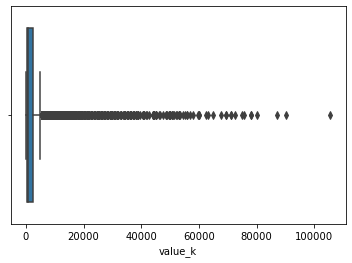

In [77]:
# check outliers
sns.boxplot(x=df8['value_k']) 
plt.show()

In [78]:
# remove the outliers by replacing the upper limit and lower limit
iqr = np.percentile(df8['value_k'],75) - np.percentile(df8['value_k'],25) 
upper_limit = np.percentile(df8['value_k'],75) + 1.5*iqr
lower_limit = np.percentile(df8['value_k'],25) - 1.5*iqr
upper_limit, lower_limit

(5437.5, -2662.5)

In [79]:
df8 = df8[(df8['value_k']>lower_limit) & (df8['value_k']<upper_limit)]
df8

,best_position,value_k
0,LWB,625
1,CM,600
2,CAM,1100
3,ST,0
5,RW,725
...,...,...
17120,CB,550
17121,CAM,130
17122,RB,130
17123,RB,475


<AxesSubplot:xlabel='best_position', ylabel='count'>

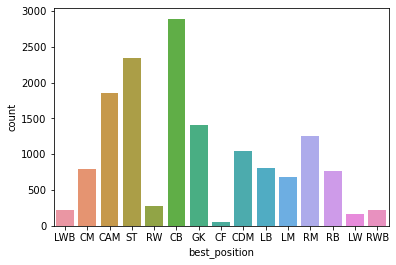

In [80]:
# Get an impression of the number of players in positions
sns.countplot('best_position', data = df8)

#### Group the best position and get the mean of the value_k

In [81]:
# Extract the mean of the value_k and group by with the positions
df9 = df8.groupby(['best_position'])['value_k'].mean().reset_index()
df9


,best_position,value_k
0,CAM,1120.747170
1,CB,999.299204
2,CDM,1246.910561
3,CF,1264.534483
4,CM,1283.201266
5,GK,875.635587
6,LB,1044.632754
7,LM,1079.777614
8,LW,1230.029070
9,LWB,1163.598174


In [82]:
# Sort the order desc
df9 = df9.sort_values(by='value_k', ascending=False)
df9



,best_position,value_k
12,RW,1288.737589
4,CM,1283.201266
13,RWB,1269.879070
3,CF,1264.534483
2,CDM,1246.910561
8,LW,1230.029070
10,RB,1206.615783
9,LWB,1163.598174
0,CAM,1120.747170
7,LM,1079.777614


<function matplotlib.pyplot.show(close=None, block=None)>

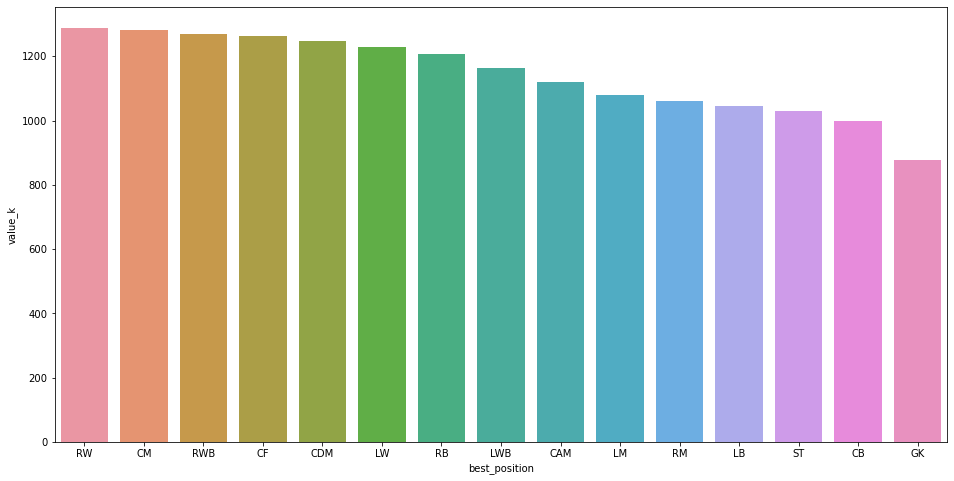

In [125]:
# the average market value of each position
plt.figure(figsize=(16,8))
sns.barplot(x='best_position', y='value_k', data = df9)
plt.show

### Results:
After removing the outliers we see that the top 5 market value positions are RW, CM, RWB, CF, CDM
    

### 2. Which age group has the highest market value?

#### Create a new column with age_group!

In [83]:

conditions = [
    (df1['age'] >= 15) & (df1['age'] <= 20),
    (df1['age'] > 20) & (df1['age'] <= 25),
    (df1['age'] > 25) & (df1['age'] <= 30),
    (df1['age'] > 30) & (df1['age'] <= 35),
    (df1['age'] > 35) & (df1['age'] <= 40),
    (df1['age'] > 40) & (df1['age'] <= 45),
    (df1['age'] > 45) & (df1['age'] <= 50),
    (df1['age'] > 50) & (df1['age'] <= 55),
    ]

values = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55']
df1['age_group'] = np.select(conditions, values)

In [84]:
df1.head()

,id,name,age,overall_rating,nationality,club,best_overall,best_position,potential,height,weight,foot,growth,value_k,wage_k,release_clause_k,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,week_foot_rate,skill_move,attacking_work_rate,defense_work_rate,international_reputation,pace,shooting,passing,dribbling,physical,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,gender,joined_year,contract_start,contract_end,age_group
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,69,182,81,Left,0,625,7.0,0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,60.0,208,70,69,69.0,56,14,5,15,10,12,1929,408,3,2,Medium,High,2,71,59,70,71,69,4,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70,17,Male,2008,2008,2016,31-35
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,71,177,64,Right,0,600,7.0,1100,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4,3,Medium,Medium,1,53,69,73,69,63,4,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,66,66,66,62,60,60,60,60,60,17,Male,2014,2014,2019,36-40
2,27,J. Cole,33,71,England,Coventry City,71,CAM,71,175,72,Right,0,1100,15.0,0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,60.0,99,35,34,30.0,51,9,6,13,16,7,1770,354,4,4,Medium,Low,2,45,68,76,77,52,11,64,64,64,70,69,69,69,70,71,71,71,68,66,66,66,68,52,54,54,54,52,47,46,46,46,47,15,Male,2016,2016,2020,31-35
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,82,180,74,Right,14,0,0.0,0,264,54,70,60,80,60.0,255,68,60.0,46,64,77,176,59,62,60.0,55,60.0,239,63,60.0,51,66,59,271,59,70.0,72.0,60.0,70,60.0,75,34,41,60.0,68,5,21,64,21,21,1348,369,3,1,Medium,Medium,1,61,66,66,69,60,3,67,67,67,66,67,67,67,66,70,70,70,66,68,68,68,66,56,65,65,65,56,57,51,51,51,57,22,Male,2019,2009,2022,36-40
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,170,67,Right,0,5500,12.0,7200,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4,4,High,Medium,4,58,70,85,85,59,149,72,72,72,79,79,79,79,79,82,82,82,79,81,81,81,79,70,73,73,73,70,67,64,64,64,67,17,Male,2018,2018,2021,36-40


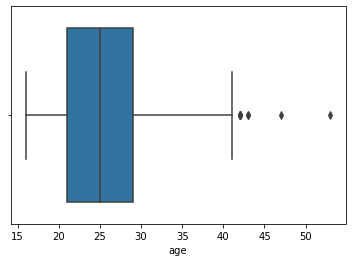

In [85]:
# see the iqr of the age
sns.boxplot(x="age", data=df1) # same as sns.boxplot(data["median_home_val"])
plt.show()

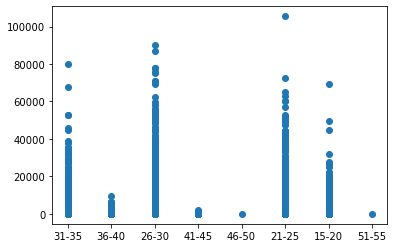

In [86]:
# Show the scatter on age_group and the value_k. This didnt show well

plt.scatter(df1['age_group'], df1['value_k'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

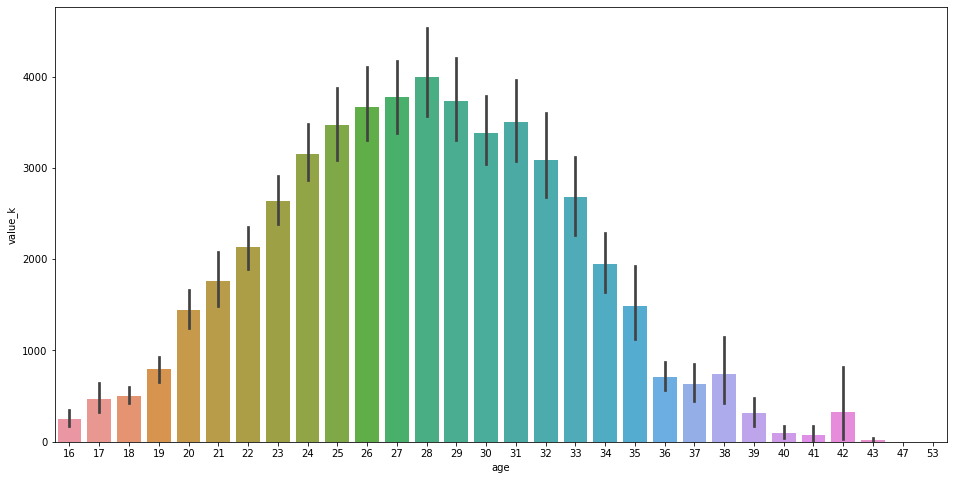

In [87]:
# Retry with using barplot with 'age' and 'value_k'
plt.figure(figsize=(16,8))
sns.barplot(x='age', y='value_k', data = df1)
plt.show

In [88]:
# Also check the correlation between age and value_k
corr_data = df1[['age', 'overall_rating', 'best_overall', 'potential', 'height', 'weight', 'value_k', 'wage_k', 'release_clause_k']]

In [89]:
correlations_matrix = corr_data.corr() 

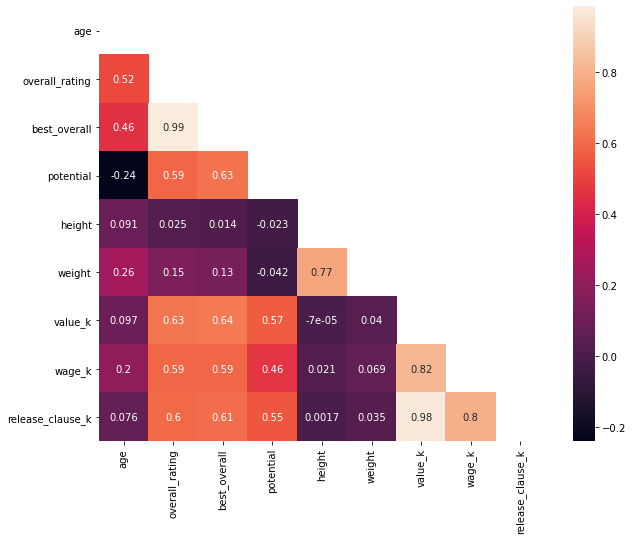

In [90]:
# Coorelation of values with age
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

### Result: 
From the barplot (x = age y = value) we can see that the age group between 26 to 30 years old have the most highest market values.
However, we could not see the high correlation betwee Age and the market value ('value_k') in the correlation map.

### 3. Does 'composure' (good in controlling stress) lifts player's overall rating ?

In [91]:
df1.dtypes['composure']

dtype('float64')

In [92]:
#list(df1.columns)

In [93]:
corr_data_2 = df1[['age', 'overall_rating', 'best_overall',
       'potential', 'height', 'weight', 'growth',
       'value_k', 'wage_k', 'release_clause_k', 'attacking', 'crossing',
        'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'composure']]

In [94]:
correlations_matrix = corr_data_2.corr() 

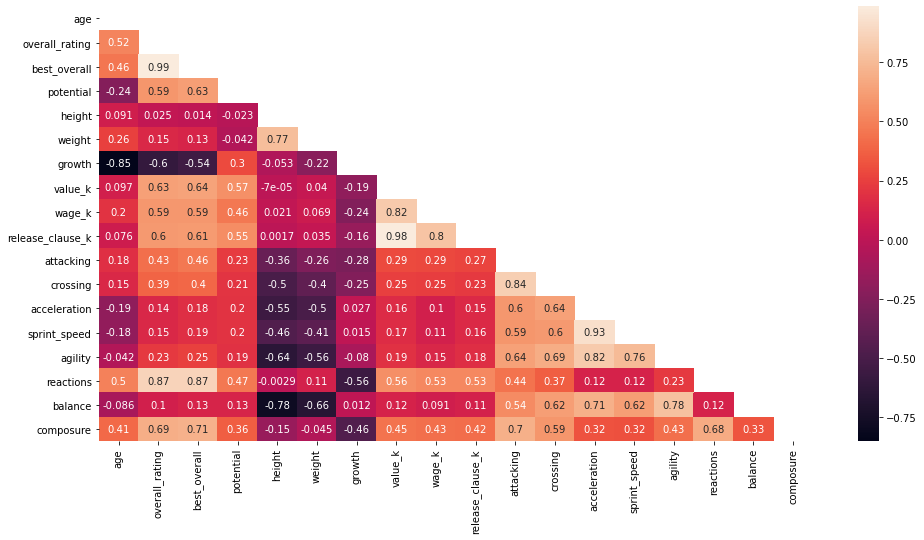

In [95]:
# Coorelation of values with composure
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(16,8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [96]:
# Check also what high correlation composure have.
# best_overall, attacking, short_passing.... etc also have high correlation
df1_corr = df1.corr()
df1_corr[(df1_corr['composure'] > 0.8) | (df1_corr['composure'] < -0.8)]

,id,age,overall_rating,best_overall,potential,height,weight,growth,value_k,wage_k,release_clause_k,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,week_foot_rate,skill_move,international_reputation,pace,shooting,passing,dribbling,physical,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,joined_year,contract_start,contract_end
composure,-0.357438,0.408984,0.694745,0.710593,0.362417,-0.154051,-0.045273,-0.462068,0.446673,0.428818,0.423299,0.704999,0.588033,0.557788,0.514065,0.717054,0.614717,0.708816,0.631189,0.638104,0.594207,0.670277,0.700212,0.477965,0.322133,0.318135,0.427751,0.681867,0.328672,0.699302,0.616155,0.239277,0.5145,0.265461,0.639077,0.74293,0.529542,0.384088,0.609199,0.656698,0.575671,1.0,0.355231,0.393495,0.344177,0.309062,-0.394587,-0.391794,-0.388587,-0.38496,-0.383618,-0.392334,0.778968,0.611005,0.28719,0.566339,0.372303,0.089933,0.364517,0.530064,0.470028,0.353614,0.18268,0.707283,0.707283,0.707283,0.683149,0.707264,0.707264,0.707264,0.683149,0.720702,0.720702,0.720702,0.699122,0.758042,0.758042,0.758042,0.699122,0.617174,0.622686,0.622686,0.622686,0.617174,0.574358,0.501983,0.501983,0.501983,0.574358,-0.347105,-0.125495,-0.123165,0.031484


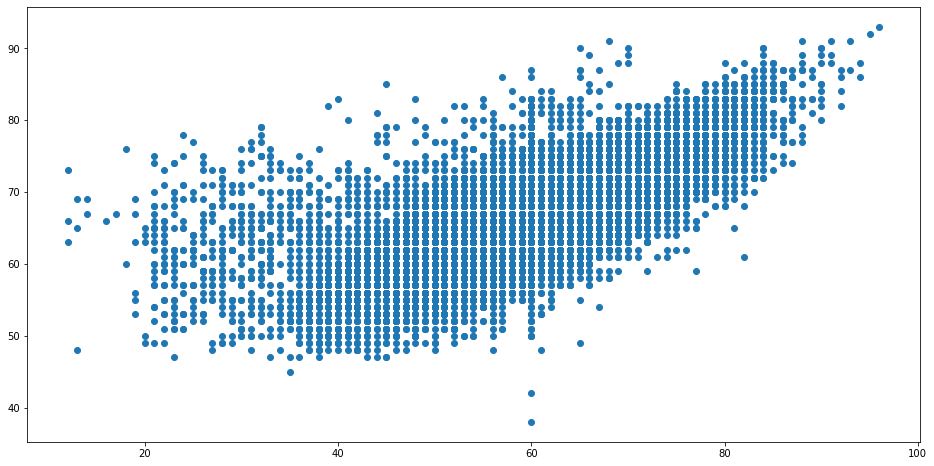

In [124]:
# Check the scatter plot. The more composure rate is higher, the overall_rating increases
plt.figure(figsize=(16,8))
plt.scatter(df1['composure'], df1['overall_rating'])
plt.show()

### Results: 
We can see a relatively high correlation between composure and overall_rating which proves that the higher composure the player has, the hight overall_rating the player gets.
Another finding of high correlation is that the higher the composure the player has, the performance (e.g. 'attacking', 'short_passing', 'skills', 'ball_controll', 'reaction', and more values are tend to be high. 
The scatter plot shows an increase form that when the composure score is higher the overall_rating also increases.

# 5. Data processing

In [98]:
df3 = df.copy()
df3

,id,name,age,overall_rating,nationality,club,best_overall,best_position,potential,height,weight,foot,growth,value_k,wage_k,release_clause_k,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,week_foot_rate,skill_move,attacking_work_rate,defense_work_rate,international_reputation,pace,shooting,passing,dribbling,physical,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,gender,joined_year,contract_start,contract_end
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,69,182,81,Left,0,625,7.0,0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,60.0,208,70,69,69.0,56,14,5,15,10,12,1929,408,3,2,Medium,High,2,71,59,70,71,69,4,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70,17,Male,2008,2008,2016
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,71,177,64,Right,0,600,7.0,1100,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4,3,Medium,Medium,1,53,69,73,69,63,4,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,66,66,66,62,60,60,60,60,60,17,Male,2014,2014,2019
2,27,J. Cole,33,71,England,Coventry City,71,CAM,71,175,72,Right,0,1100,15.0,0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,60.0,99,35,34,30.0,51,9,6,13,16,7,1770,354,4,4,Medium,Low,2,45,68,76,77,52,11,64,64,64,70,69,69,69,70,71,71,71,68,66,66,66,68,52,54,54,54,52,47,46,46,46,47,15,Male,2016,2016,2020
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,82,180,74,Right,14,0,0.0,0,264,54,70,60,80,60.0,255,68,60.0,46,64,77,176,59,62,60.0,55,60.0,239,63,60.0,51,66,59,271,59,70.0,72.0,60.0,70,60.0,75,34,41,60.0,68,5,21,64,21,21,1348,369,3,1,Medium,Medium,1,61,66,66,69,60,3,67,67,67,66,67,67,67,66,70,70,70,66,68,68,68,66,56,65,65,65,56,57,51,51,51,57,22,Male,2019,2009,2022
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,170,67,Right,0,5500,12.0,7200,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4,4,High,Medium,4,58,70,85,85,59,149,72,72,72,79,79,79,79,79,82,82,82,79,81,81,81,79,70,73,73,73,70,67,64,64,64,67,17,Male,2018,2018,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,69,198,74,Right,5,550,2.0,0,197,35,23,66,47,26.0,193,44,26.0,33,34,56,243,52,55,46.0,48,42.0,279,48,70.0,59,74,28,218,69,58.0,23.0,29.0,39,46.0,198,61,71,66.0,39,11,8,8,5,7,1367,302,2,2,Medium,Medium,1,54,30,37,48,69,5,43,43,43,41,41,41,41,41,41,41,41,43,44,44,44,43,54,55,55,55,54,57,64,64,64,57,12,Male,2020,2021,2022
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,66,177,76,Right,10,130,3.0,273,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.0,132,34,42,56.0,57,1

#### Filter to the necessary features that will effect the value_k
resource: https://towardsdatascience.com/predicting-market-value-of-fifa-soccer-players-with-regression-5d79aed207d9

In [99]:
# Collect the necessary columns for modeling
df3 = df3[['age', 'overall_rating', 'best_position', 'potential', 'value_k', 'wage_k', 'height', 'weight', 'short_passing', 'long_passing', 
          'defending', 'shooting', 'goalkeeping', 'marking', 'mentality', 'reactions', 'contract_end']]

In [100]:
df3.head()

,age,overall_rating,best_position,potential,value_k,wage_k,height,weight,short_passing,long_passing,defending,shooting,goalkeeping,marking,mentality,reactions,contract_end
0,33,69,LWB,69,625,7.0,182,81,71,69,208,59,56,70,320,69,2016
1,37,71,CM,71,600,7.0,177,64,76,71,153,69,56,70,362,65,2019
2,33,71,CAM,71,1100,15.0,175,72,77,69,99,68,51,35,317,59,2020
3,36,68,ST,82,0,0.0,180,74,80,64,75,66,68,34,271,55,2022
4,36,81,CAM,81,5500,12.0,170,67,90,83,181,70,45,68,370,75,2021


#### Check how the data is distributed

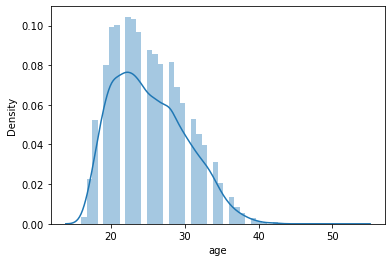

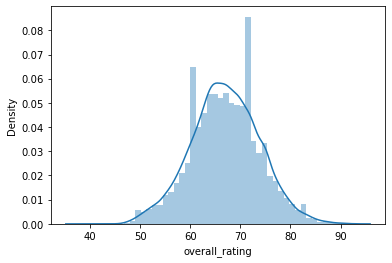

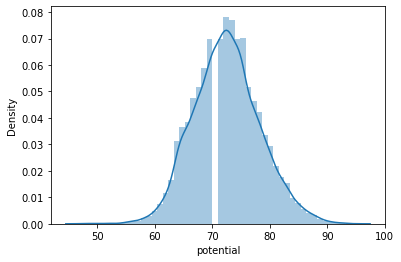

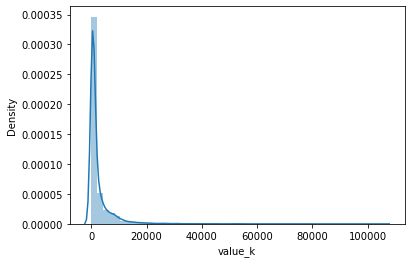

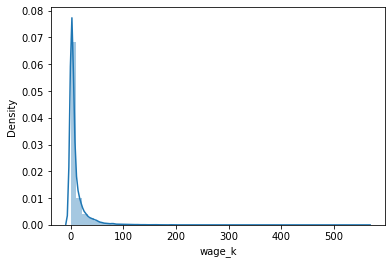

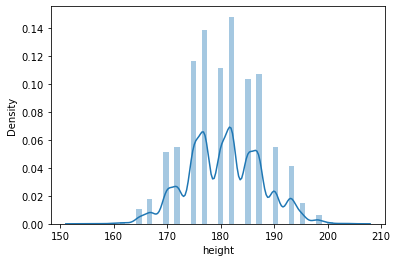

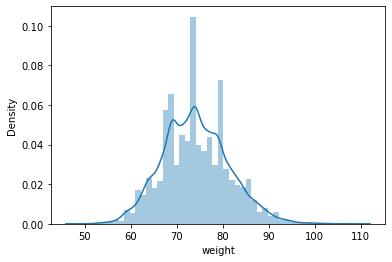

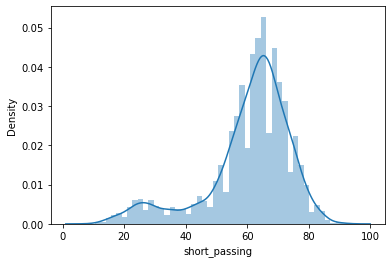

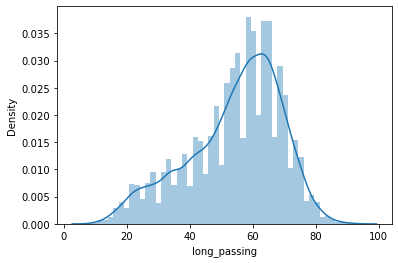

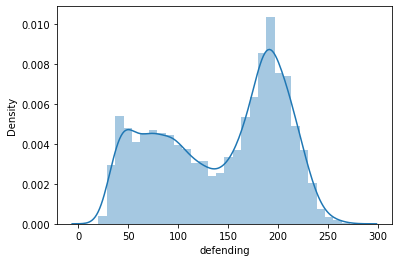

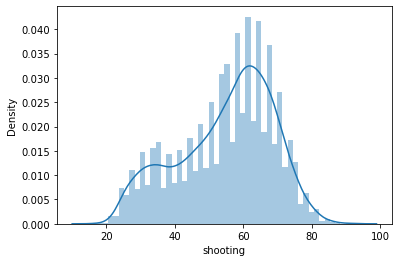

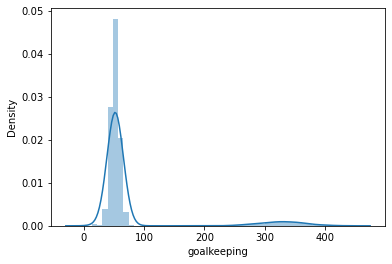

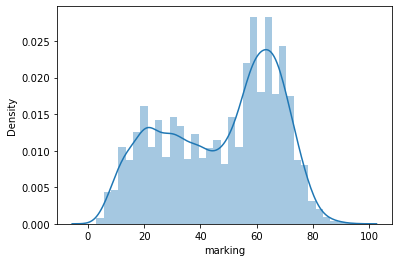

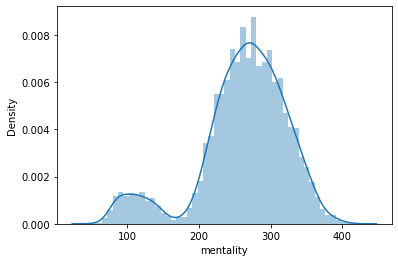

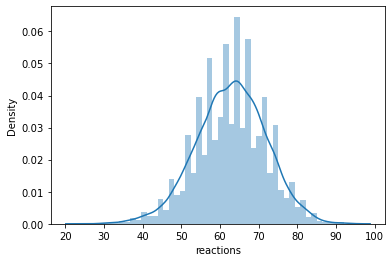

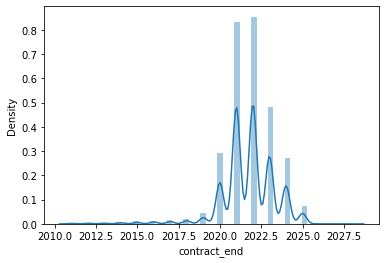

In [101]:
# See the distribution of the columns
for column in df3.select_dtypes(np.number).columns:
    sns.distplot(df3[column])
    plt.show()

#### Apply boxcox transform: the reason for choosing is because boxcox will use all lambdas to see the best transformation

In [102]:
# Apply boxcox transform: the reason for choosing is because boxcox will use 
#all lambdas to see the best transformation

def boxcox_transform(df3):
    numeric_cols = df3.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df3[column] = np.where(df3[column]<=0, np.NAN, df3[column]) 
        df3[column] = df3[column].fillna(df3[column].mean())
        #print(column)
        transformed_data, ci = stats.boxcox(df3[column])
        df3[column] = transformed_data
        _ci[column] = [ci] 
    return df3, _ci

In [103]:
# Save lambda value for invert for later usage
df3, _ci = boxcox_transform(df3)
df3

,age,overall_rating,best_position,potential,value_k,wage_k,height,weight,short_passing,long_passing,defending,shooting,goalkeeping,marking,mentality,reactions,contract_end
0,2.333448,60.295357,LWB,12.251458,5.309956,1.793052,13.294784,5.491405,14541.528056,806.658024,217.436655,460.904251,1.027273,88.092030,69217.935074,218.724065,2.409024e+153
1,2.380620,62.007114,CM,12.433957,5.282514,1.793052,13.149921,5.133324,17191.284092,847.012080,159.125244,594.455114,1.027273,88.092030,89206.768923,201.810403,2.583110e+153
2,2.333448,62.007114,CAM,12.433957,5.682941,2.418145,13.091194,5.311332,17753.033171,806.658024,102.107759,580.518961,1.025157,41.377442,67889.612545,177.107117,2.643829e+153
3,2.369445,59.438801,ST,13.389412,6.234896,2.153662,13.237169,5.353036,19503.039757,709.370956,76.870841,553.028834,1.031107,40.081466,49173.408935,161.105667,2.769489e+153
4,2.369445,70.540374,CAM,13.305660,6.676078,2.239313,12.942346,5.202313,26056.936111,1105.966581,188.785977,608.517726,1.022014,85.365138,93309.707996,244.727691,2.705945e+153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,2.155011,56.007886,CB,12.251458,5.223789,0.673062,13.740841,5.353036,5271.223939,240.549770,206.820097,153.335630,1.017930,75.868322,31426.798035,134.064183,2.769489e+153
17121,2.059799,49.121903,CAM,11.972028,4.202802,1.048728,13.149921,5.393735,11264.922288,653.502624,136.919335,307.506875,1.027652,40.081466,44798.819800,157.166190,2.705945e+153
17122,2.059799,49.121903,RB,12.065952,4.202802,0.673062,13.091194,5.246774,3997.136823,265.266355,169.711875,197.107142,1.018694,67.791234,43737.872379,177.107117,2.769489e+153
17123,2.110383,54.289510,RB,12.613582,5.124128,1.048728,13.091194,5.179632,9611.338034,581.987821,187.725724,188.018818,1.025157,70.476759,44090.069678,165.069784,2.834492e+153


#### Check the outliers and remove

In [104]:
# define the function of removing the outliers
def remove_outliers(df3, threshold=1.5, in_columns=df3.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df3[column],75)
            lower = np.percentile(df3[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            df3 = df3[(df3[column]>lower_limit) & (df3[column]<upper_limit)]
    return df3


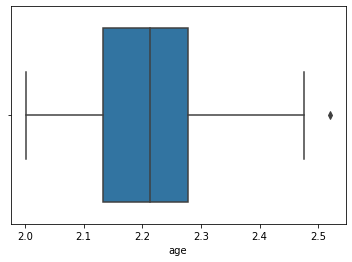

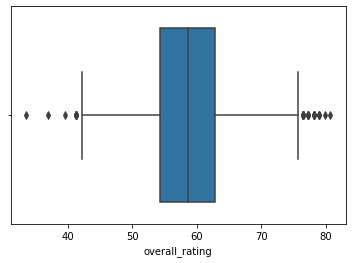

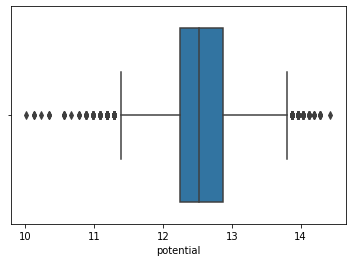

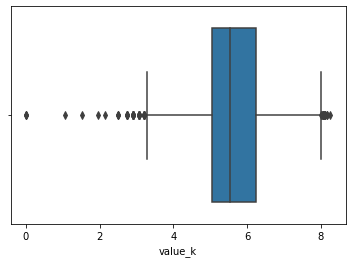

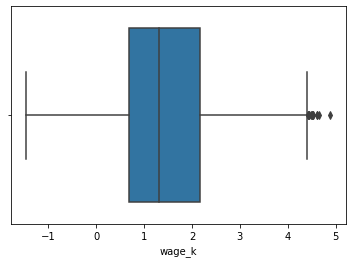

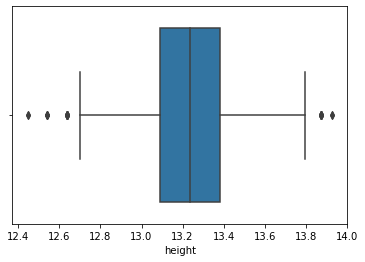

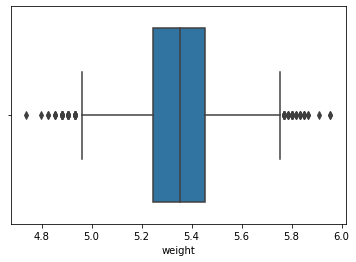

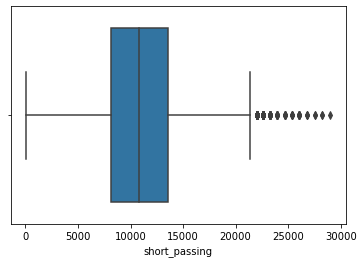

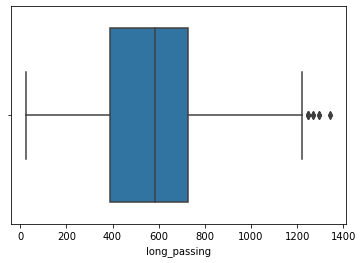

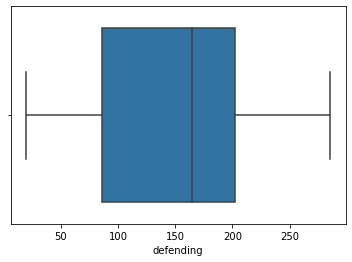

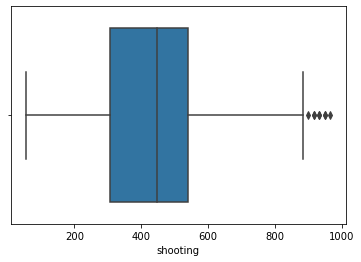

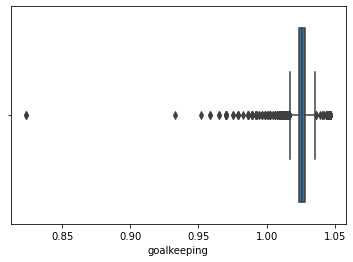

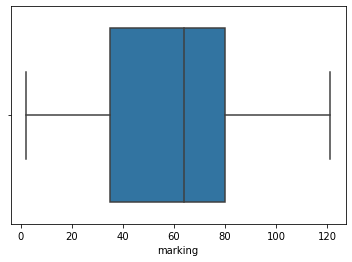

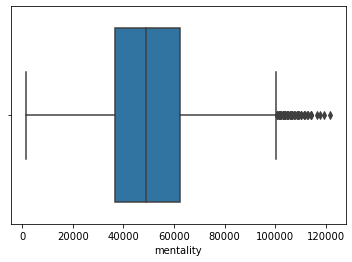

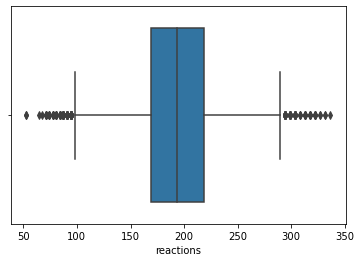

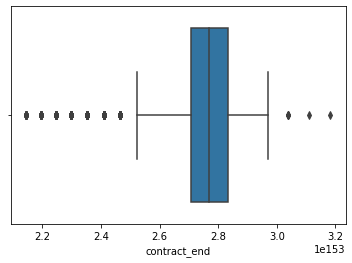

In [105]:
# Check the outliers: all columns EXCEPT defending, marking are outliers
for column in df3.select_dtypes(np.number).columns:
    sns.boxplot(df3[column])
    plt.show()

In [106]:
# Apply to the funtion and skip defending and marking
df3 = remove_outliers(df3, threshold=1.5, skip_columns= ['defending', 'marking'])
df3

,age,overall_rating,best_position,potential,value_k,wage_k,height,weight,short_passing,long_passing,defending,shooting,goalkeeping,marking,mentality,reactions,contract_end
1,2.380620,62.007114,CM,12.433957,5.282514,1.793052,13.149921,5.133324,17191.284092,847.012080,159.125244,594.455114,1.027273,88.092030,89206.768923,201.810403,2.583110e+153
2,2.333448,62.007114,CAM,12.433957,5.682941,2.418145,13.091194,5.311332,17753.033171,806.658024,102.107759,580.518961,1.025157,41.377442,67889.612545,177.107117,2.643829e+153
3,2.369445,59.438801,ST,13.389412,6.234896,2.153662,13.237169,5.353036,19503.039757,709.370956,76.870841,553.028834,1.031107,40.081466,49173.408935,161.105667,2.769489e+153
12,2.357876,69.688867,CF,13.221323,6.676078,2.090650,13.091194,5.311332,20108.173463,690.537613,72.672846,786.896496,1.029683,32.367080,79841.797826,280.518939,2.769489e+153
28,2.380620,71.391495,CB,13.555205,6.234896,2.153662,13.294784,5.528956,14042.913959,806.658024,181.365609,387.163434,1.031867,112.874876,35403.785368,130.306111,2.769489e+153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,2.155011,56.007886,CB,12.251458,5.223789,0.673062,13.740841,5.353036,5271.223939,240.549770,206.820097,153.335630,1.017930,75.868322,31426.798035,134.064183,2.769489e+153
17121,2.059799,49.121903,CAM,11.972028,4.202802,1.048728,13.149921,5.393735,11264.922288,653.502624,136.919335,307.506875,1.027652,40.081466,44798.819800,157.166190,2.705945e+153
17122,2.059799,49.121903,RB,12.065952,4.202802,0.673062,13.091194,5.246774,3997.136823,265.266355,169.711875,197.107142,1.018694,67.791234,43737.872379,177.107117,2.769489e+153
17123,2.110383,54.289510,RB,12.613582,5.124128,1.048728,13.091194,5.179632,9611.338034,581.987821,187.725724,188.018818,1.025157,70.476759,44090.069678,165.069784,2.834492e+153


#### Look into the correlation

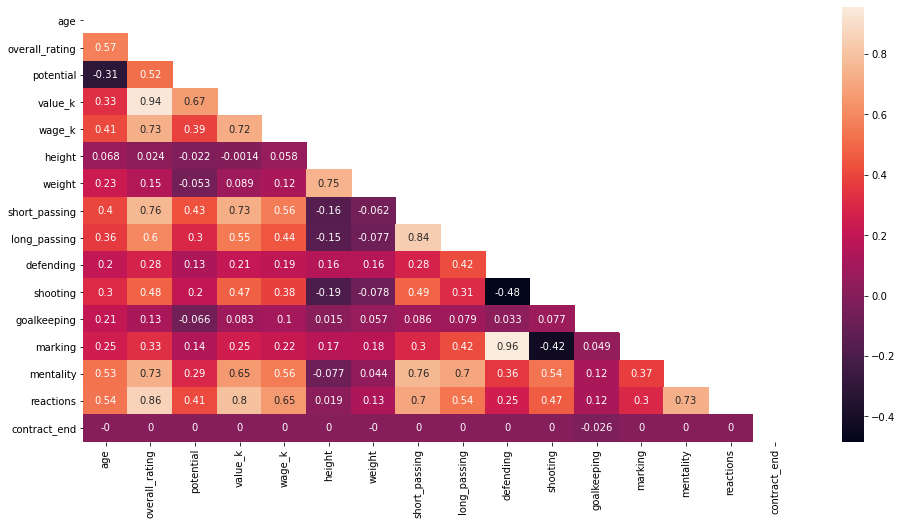

In [107]:


corr_data_3 = df3
correlations_matrix = corr_data_3.corr() 

mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(16,8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

#### Remove one of the two values that is highly correlated

In [108]:
# Drop 'overall_rating', 'defending' due to high correlation
df3 = df3.drop(['overall_rating', 'defending'], axis =1)


In [109]:
df3

,age,best_position,potential,value_k,wage_k,height,weight,short_passing,long_passing,shooting,goalkeeping,marking,mentality,reactions,contract_end
1,2.380620,CM,12.433957,5.282514,1.793052,13.149921,5.133324,17191.284092,847.012080,594.455114,1.027273,88.092030,89206.768923,201.810403,2.583110e+153
2,2.333448,CAM,12.433957,5.682941,2.418145,13.091194,5.311332,17753.033171,806.658024,580.518961,1.025157,41.377442,67889.612545,177.107117,2.643829e+153
3,2.369445,ST,13.389412,6.234896,2.153662,13.237169,5.353036,19503.039757,709.370956,553.028834,1.031107,40.081466,49173.408935,161.105667,2.769489e+153
12,2.357876,CF,13.221323,6.676078,2.090650,13.091194,5.311332,20108.173463,690.537613,786.896496,1.029683,32.367080,79841.797826,280.518939,2.769489e+153
28,2.380620,CB,13.555205,6.234896,2.153662,13.294784,5.528956,14042.913959,806.658024,387.163434,1.031867,112.874876,35403.785368,130.306111,2.769489e+153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,2.155011,CB,12.251458,5.223789,0.673062,13.740841,5.353036,5271.223939,240.549770,153.335630,1.017930,75.868322,31426.798035,134.064183,2.769489e+153
17121,2.059799,CAM,11.972028,4.202802,1.048728,13.149921,5.393735,11264.922288,653.502624,307.506875,1.027652,40.081466,44798.819800,157.166190,2.705945e+153
17122,2.059799,RB,12.065952,4.202802,0.673062,13.091194,5.246774,3997.136823,265.266355,197.107142,1.018694,67.791234,43737.872379,177.107117,2.769489e+153
17123,2.110383,RB,12.613582,5.124128,1.048728,13.091194,5.179632,9611.338034,581.987821,188.018818,1.025157,70.476759,44090.069678,165.069784,2.834492e+153


In [110]:
# Encoding: change the categorical into numerical
df3 = pd.get_dummies(df3, drop_first=True)
df3

,age,potential,value_k,wage_k,height,weight,short_passing,long_passing,shooting,goalkeeping,marking,mentality,reactions,contract_end,best_position_CB,best_position_CDM,best_position_CF,best_position_CM,best_position_LB,best_position_LM,best_position_LW,best_position_LWB,best_position_RB,best_position_RM,best_position_RW,best_position_RWB,best_position_ST
1,2.380620,12.433957,5.282514,1.793052,13.149921,5.133324,17191.284092,847.012080,594.455114,1.027273,88.092030,89206.768923,201.810403,2.583110e+153,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2.333448,12.433957,5.682941,2.418145,13.091194,5.311332,17753.033171,806.658024,580.518961,1.025157,41.377442,67889.612545,177.107117,2.643829e+153,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.369445,13.389412,6.234896,2.153662,13.237169,5.353036,19503.039757,709.370956,553.028834,1.031107,40.081466,49173.408935,161.105667,2.769489e+153,0,0,0,0,0,0,0,0,0,0,0,0,1
12,2.357876,13.221323,6.676078,2.090650,13.091194,5.311332,20108.173463,690.537613,786.896496,1.029683,32.367080,79841.797826,280.518939,2.769489e+153,0,0,1,0,0,0,0,0,0,0,0,0,0
28,2.380620,13.555205,6.234896,2.153662,13.294784,5.528956,14042.913959,806.658024,387.163434,1.031867,112.874876,35403.785368,130.306111,2.769489e+153,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,2.155011,12.251458,5.223789,0.673062,13.740841,5.353036,5271.223939,240.549770,153.335630,1.017930,75.868322,31426.798035,134.064183,2.769489e+153,1,0,0,0,0,0,0,0,0,0,0,0,0
17121,2.059799,11.972028,4.202802,1.048728,13.149921,5.393735,11264.922288,653.502624,307.506875,1.027652,40.081466,44798.819800,157.166190,2.705945e+153,0,0,0,0,0,0,0,0,0,0,0,0,0
17122,2.059799,12.065952,4.202802,0.673062,13.091194,5.246774,3997.136823,265.266355,197.107142,1.018694,67.791234,43737.872379,177.107117,2.769489e+153,0,0,0,0,0,0,0,0,1,0,0,0,0
17123,2.110383,12.613582,5.124128,1.048728,13.091194,5.179632,9611.338034,581.987821,188.018818,1.025157,70.476759,44090.069678,165.069784,2.834492e+153,0,0,0,0,0,0,0,0,1,0,0,0,0


In [111]:
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#### Standardize to have same scale

In [112]:
# select all numericals and apply standardization!
X_num = df3.select_dtypes(include = np.number)
X_num


,age,potential,value_k,wage_k,height,weight,short_passing,long_passing,shooting,goalkeeping,marking,mentality,reactions,contract_end,best_position_CB,best_position_CDM,best_position_CF,best_position_CM,best_position_LB,best_position_LM,best_position_LW,best_position_LWB,best_position_RB,best_position_RM,best_position_RW,best_position_RWB,best_position_ST
1,2.380620,12.433957,5.282514,1.793052,13.149921,5.133324,17191.284092,847.012080,594.455114,1.027273,88.092030,89206.768923,201.810403,2.583110e+153,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2.333448,12.433957,5.682941,2.418145,13.091194,5.311332,17753.033171,806.658024,580.518961,1.025157,41.377442,67889.612545,177.107117,2.643829e+153,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.369445,13.389412,6.234896,2.153662,13.237169,5.353036,19503.039757,709.370956,553.028834,1.031107,40.081466,49173.408935,161.105667,2.769489e+153,0,0,0,0,0,0,0,0,0,0,0,0,1
12,2.357876,13.221323,6.676078,2.090650,13.091194,5.311332,20108.173463,690.537613,786.896496,1.029683,32.367080,79841.797826,280.518939,2.769489e+153,0,0,1,0,0,0,0,0,0,0,0,0,0
28,2.380620,13.555205,6.234896,2.153662,13.294784,5.528956,14042.913959,806.658024,387.163434,1.031867,112.874876,35403.785368,130.306111,2.769489e+153,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,2.155011,12.251458,5.223789,0.673062,13.740841,5.353036,5271.223939,240.549770,153.335630,1.017930,75.868322,31426.798035,134.064183,2.769489e+153,1,0,0,0,0,0,0,0,0,0,0,0,0
17121,2.059799,11.972028,4.202802,1.048728,13.149921,5.393735,11264.922288,653.502624,307.506875,1.027652,40.081466,44798.819800,157.166190,2.705945e+153,0,0,0,0,0,0,0,0,0,0,0,0,0
17122,2.059799,12.065952,4.202802,0.673062,13.091194,5.246774,3997.136823,265.266355,197.107142,1.018694,67.791234,43737.872379,177.107117,2.769489e+153,0,0,0,0,0,0,0,0,1,0,0,0,0
17123,2.110383,12.613582,5.124128,1.048728,13.091194,5.179632,9611.338034,581.987821,188.018818,1.025157,70.476759,44090.069678,165.069784,2.834492e+153,0,0,0,0,0,0,0,0,1,0,0,0,0


In [113]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)

df3 = pd.DataFrame(x_standardized)
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,2.126946,-0.254187,-0.404769,0.470101,-0.445185,-1.455388,1.568506,1.268409,1.168567,0.580604,1.104460,2.373778,0.235665,-2.130873,-0.516272,-0.294638,-0.071576,3.954004,-0.254623,-0.234911,-0.114081,-0.128879,-0.252126,-0.318228,-0.143,-0.131101,-0.455731
1,1.562570,-0.254187,0.092552,1.008107,-0.760287,-0.170719,1.722122,1.066353,1.081152,-0.103747,-0.880438,1.009641,-0.486944,-1.407056,-0.516272,-0.294638,-0.071576,-0.252908,-0.254623,-0.234911,-0.114081,-0.128879,-0.252126,-0.318228,-0.143,-0.131101,-0.455731
2,1.993252,1.757144,0.778065,0.780471,0.022946,0.130254,2.200681,0.579229,0.908717,1.820760,-0.935504,-0.188055,-0.955011,0.090884,-0.516272,-0.294638,-0.071576,-0.252908,-0.254623,-0.234911,-0.114081,-0.128879,-0.252126,-0.318228,-0.143,-0.131101,2.194279
3,1.854835,1.403300,1.326002,0.726238,-0.760287,-0.170719,2.366162,0.484928,2.375675,1.360097,-1.263287,1.774491,2.538009,0.090884,-0.516272,-0.294638,13.971105,-0.252908,-0.254623,-0.234911,-0.114081,-0.128879,-0.252126,-0.318228,-0.143,-0.131101,-0.455731
4,2.126946,2.106156,0.778065,0.780471,0.332083,1.399856,0.707549,1.066353,-0.131690,2.066717,2.157481,-1.069206,-1.855944,0.090884,1.936963,-0.294638,-0.071576,-0.252908,-0.254623,-0.234911,-0.114081,-0.128879,-0.252126,-0.318228,-0.143,-0.131101,-0.455731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14317,-0.572311,-0.638368,-0.477703,-0.493855,2.725429,0.130254,-1.691168,-1.768199,-1.598399,-2.441332,0.585076,-1.323704,-1.746015,0.090884,1.936963,-0.294638,-0.071576,-0.252908,-0.254623,-0.234911,-0.114081,-0.128879,-0.252126,-0.318228,-0.143,-0.131101,-0.455731
14318,-1.711461,-1.226596,-1.745744,-0.170526,-0.445185,0.423977,-0.052124,0.299491,-0.631344,0.703395,-0.935504,-0.467995,-1.070246,-0.666595,-0.516272,-0.294638,-0.071576,-0.252908,-0.254623,-0.234911,-0.114081,-0.128879,-0.252126,-0.318228,-0.143,-0.131101,-0.455731
14319,-1.711461,-1.028876,-1.745744,-0.493855,-0.760287,-0.636630,-2.039581,-1.644441,-1.323838,-2.194327,0.241882,-0.535888,-0.486944,0.090884,-0.516272,-0.294638,-0.071576,-0.252908,-0.254623,-0.234911,-0.114081,-0.128879,3.966271,-0.318228,-0.143,-0.131101,-0.455731
14320,-1.106256,0.123942,-0.601481,-0.170526,-0.760287,-1.121187,-0.504315,-0.058590,-1.380845,-0.103747,0.355989,-0.513350,-0.839054,0.865762,-0.516272,-0.294638,-0.071576,-0.252908,-0.254623,-0.234911,-0.114081,-0.128879,3.966271,-0.318228,-0.143,-0.131101,-0.455731


In [114]:
# recover the columns 
cols = ['age', 'potential', 'value_k', 'wage_k', 'height', 'weight',
 'short_passing', 'long_passing', 'shooting', 'goalkeeping', 'marking',
       'mentality', 'reactions', 'contract_end', 'best_position_CB',
       'best_position_CDM',
       'best_position_CF',
       'best_position_CM',
       'best_position_LB',
       'best_position_LM',
        'best_position_LW',
        'best_position_LWB',
        'best_position_RB',
        'best_position_RM',
        'best_position_RW',
        'best_position_RWB',
        'best_position_ST']




df3.columns = cols
df3


,age,potential,value_k,wage_k,height,weight,short_passing,long_passing,shooting,goalkeeping,marking,mentality,reactions,contract_end,best_position_CB,best_position_CDM,best_position_CF,best_position_CM,best_position_LB,best_position_LM,best_position_LW,best_position_LWB,best_position_RB,best_position_RM,best_position_RW,best_position_RWB,best_position_ST
0,2.126946,-0.254187,-0.404769,0.470101,-0.445185,-1.455388,1.568506,1.268409,1.168567,0.580604,1.104460,2.373778,0.235665,-2.130873,-0.516272,-0.294638,-0.071576,3.954004,-0.254623,-0.234911,-0.114081,-0.128879,-0.252126,-0.318228,-0.143,-0.131101,-0.455731
1,1.562570,-0.254187,0.092552,1.008107,-0.760287,-0.170719,1.722122,1.066353,1.081152,-0.103747,-0.880438,1.009641,-0.486944,-1.407056,-0.516272,-0.294638,-0.071576,-0.252908,-0.254623,-0.234911,-0.114081,-0.128879,-0.252126,-0.318228,-0.143,-0.131101,-0.455731
2,1.993252,1.757144,0.778065,0.780471,0.022946,0.130254,2.200681,0.579229,0.908717,1.820760,-0.935504,-0.188055,-0.955011,0.090884,-0.516272,-0.294638,-0.071576,-0.252908,-0.254623,-0.234911,-0.114081,-0.128879,-0.252126,-0.318228,-0.143,-0.131101,2.194279
3,1.854835,1.403300,1.326002,0.726238,-0.760287,-0.170719,2.366162,0.484928,2.375675,1.360097,-1.263287,1.774491,2.538009,0.090884,-0.516272,-0.294638,13.971105,-0.252908,-0.254623,-0.234911,-0.114081,-0.128879,-0.252126,-0.318228,-0.143,-0.131101,-0.455731
4,2.126946,2.106156,0.778065,0.780471,0.332083,1.399856,0.707549,1.066353,-0.131690,2.066717,2.157481,-1.069206,-1.855944,0.090884,1.936963,-0.294638,-0.071576,-0.252908,-0.254623,-0.234911,-0.114081,-0.128879,-0.252126,-0.318228,-0.143,-0.131101,-0.455731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14317,-0.572311,-0.638368,-0.477703,-0.493855,2.725429,0.130254,-1.691168,-1.768199,-1.598399,-2.441332,0.585076,-1.323704,-1.746015,0.090884,1.936963,-0.294638,-0.071576,-0.252908,-0.254623,-0.234911,-0.114081,-0.128879,-0.252126,-0.318228,-0.143,-0.131101,-0.455731
14318,-1.711461,-1.226596,-1.745744,-0.170526,-0.445185,0.423977,-0.052124,0.299491,-0.631344,0.703395,-0.935504,-0.467995,-1.070246,-0.666595,-0.516272,-0.294638,-0.071576,-0.252908,-0.254623,-0.234911,-0.114081,-0.128879,-0.252126,-0.318228,-0.143,-0.131101,-0.455731
14319,-1.711461,-1.028876,-1.745744,-0.493855,-0.760287,-0.636630,-2.039581,-1.644441,-1.323838,-2.194327,0.241882,-0.535888,-0.486944,0.090884,-0.516272,-0.294638,-0.071576,-0.252908,-0.254623,-0.234911,-0.114081,-0.128879,3.966271,-0.318228,-0.143,-0.131101,-0.455731
14320,-1.106256,0.123942,-0.601481,-0.170526,-0.760287,-1.121187,-0.504315,-0.058590,-1.380845,-0.103747,0.355989,-0.513350,-0.839054,0.865762,-0.516272,-0.294638,-0.071576,-0.252908,-0.254623,-0.234911,-0.114081,-0.128879,3.966271,-0.318228,-0.143,-0.131101,-0.455731


## 6. Fit into the model

#### X,Y split for modeling!

In [115]:
X = df3.drop('value_k', axis=1)
y = df3['value_k']

In [116]:
# Train Test Split!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
X_train

,age,potential,wage_k,height,weight,short_passing,long_passing,shooting,goalkeeping,marking,mentality,reactions,contract_end,best_position_CB,best_position_CDM,best_position_CF,best_position_CM,best_position_LB,best_position_LM,best_position_LW,best_position_LWB,best_position_RB,best_position_RM,best_position_RW,best_position_RWB,best_position_ST
3804,0.333487,-0.638368,-0.170526,0.332083,0.277999,-1.010730,-1.172721,0.994533,0.936780,-1.692128,-0.067454,0.113576,-0.666595,-0.516272,-0.294638,-0.071576,-0.252908,-0.254623,-0.234911,-0.114081,-0.128879,-0.252126,-0.318228,-0.143,-0.131101,2.194279
6557,-0.327590,-1.627162,-1.601035,-0.445185,-0.957499,-0.504315,-0.231148,-0.493099,0.321712,-0.379982,-0.883878,-1.184752,-0.666595,-0.516272,-0.294638,-0.071576,-0.252908,-0.254623,-0.234911,-0.114081,-0.128879,-0.252126,-0.318228,-0.143,-0.131101,-0.455731
3485,1.247292,-1.627162,-0.170526,1.545952,1.665031,-0.714603,-0.315787,-1.798570,-0.932972,0.700038,-0.987763,0.235665,1.658432,1.936963,-0.294638,-0.071576,-0.252908,-0.254623,-0.234911,-0.114081,-0.128879,-0.252126,-0.318228,-0.143,-0.131101,-0.455731
4333,0.124202,-0.445504,0.470101,-0.760287,-1.287128,0.443269,0.674577,0.739509,-1.520694,-0.825257,0.412114,0.358400,0.865762,-0.516272,-0.294638,-0.071576,-0.252908,-0.254623,-0.234911,-0.114081,-0.128879,-0.252126,-0.318228,-0.143,-0.131101,-0.455731
13239,0.124202,-2.450012,-1.687709,-0.760287,-0.324044,-0.610760,0.118304,-0.205750,0.703395,-0.990451,-0.967171,-1.184752,-0.666595,-0.516272,-0.294638,-0.071576,-0.252908,-0.254623,-0.234911,-0.114081,-0.128879,-0.252126,-0.318228,-0.143,-0.131101,-0.455731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.532950,0.123942,0.052194,0.022946,0.277999,0.190095,0.770968,-1.206760,1.644672,0.988595,0.490923,0.605781,-1.407056,-0.516272,-0.294638,-0.071576,-0.252908,-0.254623,-0.234911,-0.114081,-0.128879,3.966271,-0.318228,-0.143,-0.131101,-0.455731
13418,-0.572311,0.123942,0.470101,-0.445185,0.130254,0.843900,1.066353,-0.131690,-2.194327,0.413154,0.412114,-0.128638,0.865762,-0.516272,-0.294638,-0.071576,3.954004,-0.254623,-0.234911,-0.114081,-0.128879,-0.252126,-0.318228,-0.143,-0.131101,-0.455731
5390,0.124202,1.403300,1.375238,-0.445185,-1.799146,2.038193,1.791267,1.081152,0.822052,0.642523,1.502525,1.619923,0.090884,-0.516272,-0.294638,-0.071576,-0.252908,-0.254623,-0.234911,-0.114081,-0.128879,-0.252126,-0.318228,-0.143,-0.131101,-0.455731
860,1.854835,-0.254187,0.052194,1.094913,0.277999,2.200681,1.684687,1.168567,0.321712,0.527698,1.928888,1.362786,-1.407056,-0.516272,-0.294638,-0.071576,3.954004,-0.254623,-0.234911,-0.114081,-0.128879,-0.252126,-0.318228,-0.143,-0.131101,-0.455731


In [118]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 7. Analyzing Results¶

In [119]:
# Fit the model into the prediction
predictions = model.predict(X_test)

In [120]:
# Check r2_score, mae, mse 
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.8510201666343151, 0.28245397886132073, 0.3894495217812559)

In [121]:
# invert the boxbox
from scipy.special import inv_boxcox

predictions = inv_boxcox(predictions, _ci['value_k'])

In [122]:
# Display the true value, predicted value and the residuals
import math

results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['value_k'])
results['pred'] = inv_boxcox(predictions, _ci['value_k']) ##make sure to invert the prediction too
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
2996,2.219809,2.994761,0.774952
304,3.639310,19.660650,16.021341
7588,0.890213,2.595579,1.705366
7047,0.715671,2.116238,1.400567
10494,0.932504,2.351697,1.419193
...,...,...,...
6107,0.847423,2.297990,1.450567
12606,0.760196,1.711439,0.951243
408,3.096317,38.562337,35.466020
6908,0.693157,2.252192,1.559035


In [123]:
results.describe()

,true,pred,resid
count,2865.000000,2.852000e+03,2.852000e+03
mean,1.786176,1.818703e+14,1.818703e+14
std,2.131915,7.518527e+15,7.518527e+15
min,0.078676,1.083039e+00,6.196750e-02
25%,0.530052,1.706466e+00,1.150346e+00
50%,0.932504,2.694397e+00,1.745246e+00
75%,2.219809,7.413889e+00,5.294644e+00
max,18.523044,3.750048e+17,3.750048e+17
